# 화재발생여부를 예측하는 것이 목적
- binary classification

## 데이터 설명
- id    아이디(분석에 미사용)
- dt_of_fr    화재발생일시
- fr_yn    화재발생여부
- bldng_us    건물용도
- bldng_archtctr    건물구조
- bldng_cnt    건물채수
- bldng_ar    건물건축면적
- ttl_ar    건물연면적(건물층별합계전체 면적)
- lnd_ar    토지면적
- dt_of_arthrztn    건물승인일자
- ttl_grnd_flr    건물들의 지상 층수의 합
- ttl_dwn_fr    건물들의 지하 층수의 합
- bldng_us_clssfctn    건물용도분류명
- tmprtr    온도(c)
- prcpttn    강수량
- wnd_spd    풍속
- wnd_drctn    풍향
- hmdt    습도
- ele_engry_us_201401    전기 에너지 사용량(2014월1월)
- ele_engry_us_201812    전기 에너지 사용량(2018월12월)
- gas_engry_us_201401    가스 에너지 사용량(2014월1월)
- gas_engry_us_201812    가스 에너지 사용량(2018월12월)
- lw_13101010    복도/계단/출입구의 성능 유지여부(0~5)
- lw_13101110    옥상광장의 피난성능 유지여부(0~5)
- lw_13101210    방화문/방화셔터 등의 성능 유지여부(0~5)
- lw_13101211    방화구획 적합 여부(0~5)
- lw_13101310    경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
- lw_13101410    배연설비의 성능 유지여부(0~5)
- lw_13111010    내화구조의 성능 유지여부(0~5)
- lw_13111110    방화벽의 성능 유지여부(0~5)
- lw_13121010    외벽의 성능 유지여부(0~5)
- lw_13121011    창호의 성능 유지여부(0~5)
- lw_13131010    내부마감의 방화성능 유지여부(0~5)
- lw_13131110    외부마감의 노후화 및 마감재 탈락 여부(0~5)
- lw_13141010    지하층의 소방설비 성능 유지여부(0~5)
- lw_13141011    지하층 피난구/피난계단의 성능 유지여부(0~5)
- jmk    지적상 지목
- rgnl_ar_nm    용도지역지구명
- rgnl_ar_nm2    용도지역지구명2
- lnd_us_sttn_nm    토지이용상황명
- rd_sd_nm    도로측면명
- emd_nm    행정구역명
- hm_cnt    행정구역 인구
- fr_sttn_dstnc    119 안전센터와의 거리
- bldng_ar_prc    단위 면적당 건물 가격(2019년)
- fr_wthr_fclt_dstnc    소방용수시설(소화전 등)과의 최소 거리
- fr_mn_cnt    관할 소방서 인원
- mlt_us_yn    다중이용시설 포함여부
- cctv_dstnc    공공 CCTV와의 최소 거리
- cctv_in_100m    반경 100m 이내 공공 CCTV
- fr_wthr_fclt_in_100m    반경 100m 이내 소방용수 시설 수
- tbc_rtl_str_dstnc    담배 소매점과의 최소 거리
- sft_emrgnc_bll_dstnc    안전 비상벨과의 최소 거리
- ahsm_dstnc    자동 심장 충격기와의 최소 거리
- no_tbc_zn_dstnc    금연구역과의 최소 거리
- trgt_crtr    소방관리대상물기준
- fr_fghtng_fclt_spcl_css_5_yn    소방시설특례5호여부
- fr_fghtng_fclt_spcl_css_6_yn    소방시설특례6호여부
- us_yn    사용여부
- dngrs_thng_yn    위험물대상여부
- slf_fr_brgd_yn    자체소방대여부
- blk_dngrs_thng_mnfctr_yn    대량위험물제조소등여부
- cltrl_hrtg_yn    문화재여부

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', size=12)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
DATA_DIR = './data'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'validation.csv'

TRAIN_PATH = os.path.join(DATA_DIR, TRAIN_DATA)
TEST_PATH = os.path.join(DATA_DIR, TEST_DATA)

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df = pd.concat([df_train, df_test])

df = df.reset_index(drop=True)
df = df.drop("id", axis=1)

# Train Data 와 Test Data 의 개수
number_of_train_data = df_train.shape[0]
number_of_test_data = df_test.shape[0]

# Column 명 한글화
df.rename(columns={"id":"아이디",
  "dt_of_fr": "화재발생일시",
  "bldng_us":"건물용도",
  "bldng_archtctr":"건물구조",
  "bldng_cnt":"건물채수",
  "bldng_ar":"건물건축면적",
  "ttl_ar":"건물층별합계전체면적",
  "lnd_ar":"토지면적" ,
  "dt_of_athrztn":"건물승인일자" ,
  "ttl_grnd_flr":"건물들지상층수합" ,
  "ttl_dwn_flr":"건물들지하층수합",
  "bldng_us_clssfctn":"건물용도분류명",
  "prcpttn": "강수량",
  "tmprtr":"온도",
  "wnd_spd":"풍속" ,
   "wnd_drctn":"풍향",
  "hmdt":"습도",
  "jmk":"지적상지목",
   "rgnl_ar_nm":"용도지역지구명",
  "rgnl_ar_nm2":"용도지역지구명2",
  "lnd_us_sttn_nm":"토지이용상황명",
   "rd_sd_nm":"도로측면명",
   "emd_nm":"행정구역명",
   "hm_cnt":"행정구역인구",
   "fr_sttn_dstnc":"소방서거리",
   "bldng_ar_prc":"건물면적당가격",
   "fr_wthr_fclt_dstnc":"소방용수시설거리",
   "fr_mn_cnt":"관할소방서인원",
   "mlt_us_yn":"다중이용시설여부",
   "cctv_dstnc":"공공CCTV거리",
   "cctv_in_100m":"백미터이내CCTV수",
   "fr_wthr_fclt_in_100m":"백미터이내소방용수시설수",
   "tbc_rtl_str_dstnc":"담배소매점거리",
   "sft_emrgnc_bll_dstnc":"안전비상벨최소거리",
   "ahsm_dstnc":"자동심장충격기거리",
   "no_tbc_zn_dstnc":"금연구역최소거리",
   "bldng_cnt_in_50m":"반경50m건물수",
   "fr_yn":"화재발생",
   "trgt_crtr":"소방점검대상물기준",
   "fr_fghtng_fclt_spcl_css_5_yn":"소방시설특례5호여부",
   "fr_fghtng_fclt_spcl_css_6_yn":"소방시설특례6호여부",
   "us_yn":"사용여부",
   "dngrs_thng_yn":"위험물대상여부",
   "slf_fr_brgd_yn":"자체소방대여부",
   "blk_dngrs_thng_mnfctr_yn":"대량위험물제조소등여부",
   "cltrl_hrtg_yn":"문화재여부"}, inplace=True)

y_train = df_train[["fr_yn"]]
y_train_onehot = pd.get_dummies(df_train[["fr_yn"]])

y_test = df_test["fr_yn"]

# df = df.drop('화재발생', axis=1)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 데이터 전처리
## 화재발생일시 시간 전처리

In [5]:
date_time = [i.split(" ") for i in df["화재발생일시"].tolist()]
# 날짜,시간 만들기
date = []
time = []
for i in date_time:
    date.append(i[0])
    time.append(i[1])

date = [dt.datetime.strptime(char, "%Y-%m-%d") for char in date]
time = [int(char[0:2]) for char in time]

df["날짜"] = [date2.strftime('%Y-%m-%d') for date2 in date]
df["시간"] = time

# 년, 월 만들기
df['월'] =[month.month for month in date]
df['년도'] = [year.year for year in date]

# 계절 만들기
spring = [3,4,5]; summer = [6,7,8]; fall = [9,10]; winter = [10,11,1,2]
season = ['봄' if i in spring else '여름' if i in summer else '가을' if i in fall else '겨울' for i in df['월']]
df['계절'] = season

# 24시간 새벽,오전,오후,저녁으로 나누기
seperate_four = []
for season, time in zip(df['계절'], df['시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')

df['하루분기'] = seperate_four
df = df.drop("화재발생일시", axis=1)

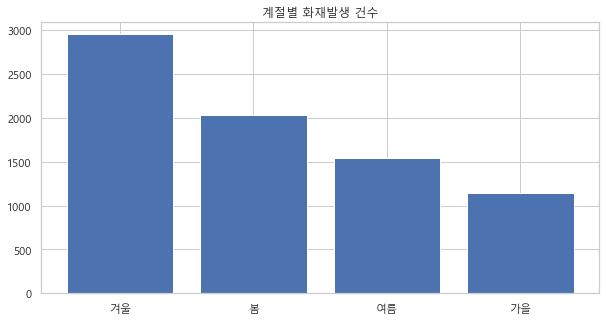

In [6]:
table = pd.crosstab(np.array(df[:number_of_train_data]['계절']), np.array(y_train["fr_yn"]))
table = table.iloc[:,1].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(table.index, table.values)
plt.title("계절별 화재발생 건수")
plt.show()

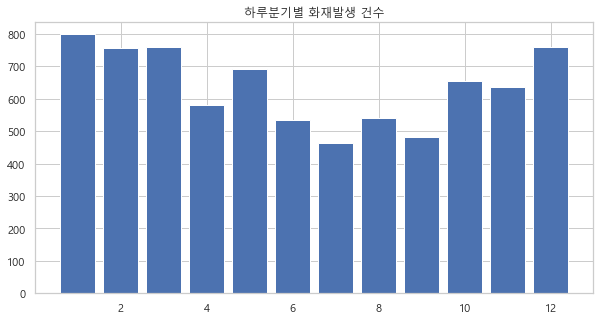

In [7]:
table = pd.crosstab(np.array(df[:number_of_train_data]['월']), np.array(y_train["fr_yn"]))
table = table.iloc[:,1].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(table.index, table.values)
plt.title("하루분기별 화재발생 건수")
plt.show()

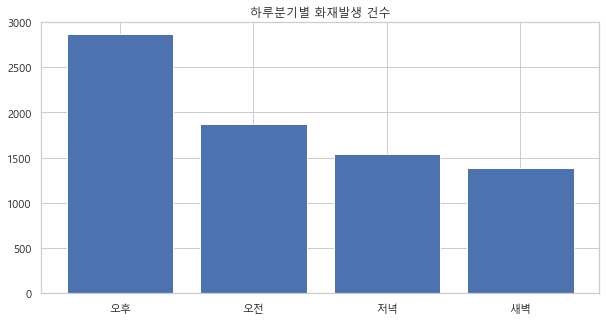

In [8]:
table = pd.crosstab(np.array(df[:number_of_train_data]['하루분기']), np.array(y_train["fr_yn"]))
table = table.iloc[:,1].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(table.index, table.values)
plt.title("하루분기별 화재발생 건수")
plt.show()

- 화재는 겨울 그리고 오후에 많이 일어난 것을 확인할 수 있다.

## 행정구역명 전처리

In [9]:
df["행정구역명"].unique()

array(['경상남도 통영시 용남면', '경상남도 거창군 북상면', '경상남도 통영시 한산면', '경상남도 거창군 고제면',
       '경상남도 의령군 정곡면', '경상남도 진주시 사봉면', '경상남도 통영시 도산면', '경상남도 진주시 지수면',
       '경상남도 진주시 성북동', '경상남도 거창군 주상면', '경상남도 밀양시 삼랑진읍', '경상남도 거제시 고현동',
       '경상남도 창원시진해구 풍호동', '경상남도 통영시 광도면', '경상남도 통영시 봉평동',
       '경상남도 창원시진해구 여좌동', '경상남도 통영시 도천동', '경상남도 밀양시 삼문동', '경상남도 통영시 산양읍',
       '경상남도 밀양시 산내면', '경상남도 밀양시 하남읍', '경상남도 밀양시 산외면', '경상남도 밀양시 상남면',
       '경상남도 밀양시 교동', '경상남도 밀양시 가곡동', '경상남도 밀양시 무안면', '경상남도 밀양시 청도면',
       '경상남도 밀양시 단장면', '경상남도 밀양시 상동면', '경상남도 통영시 북신동', '경상남도 거창군 신원면',
       '경상남도 통영시 중앙동', '경상남도 거제시 연초면', '경상남도 밀양시 초동면', '경상남도 거제시 옥포2동',
       '경상남도 거제시 둔덕면', '경상남도 사천시 사남면', '경상남도 거창군 거창읍', '경상남도 통영시 명정동',
       '경상남도 거제시 동부면', '경상남도 합천군 율곡면', '경상남도 밀양시 부북면', '경상남도 밀양시 내이동',
       '경상남도 통영시 욕지면', '경상남도 거제시 거제면', '경상남도 창원시마산합포구 노산동',
       '경상남도 양산시 덕계동', '경상남도 진주시 진성면', '경상남도 진주시 대곡면',
       '경상남도 창원시마산합포구 교방동', '경상남도 창녕군 길곡면', '경상남도 하동군 북천면',
       '경상남도 창원시마산합포구 자산동', '경상남도 남해군 이동면', '경상남도 창녕군

In [10]:
df["행정구역명"].isnull().sum()

4

In [11]:
df_test["emd_nm"].isnull().sum()

0

- 행정구역명의 NA 값은 train data 에만 4개 존재하므로 데이터 자체를 삭제

In [12]:
df = df.drop(np.where(df["행정구역명"].isnull())[0])
df = df.reset_index(drop=True)

In [13]:
number_of_train_data -= 4
y_train = df[:number_of_train_data][["화재발생"]]
y_train_onehot = pd.get_dummies(df[:number_of_train_data][["화재발생"]])

In [14]:
df["시군구"] = df["행정구역명"].str.replace("경상남도", "").map(lambda x: x[1:4])

### 지역별로 화재발생 차이가 있는가?

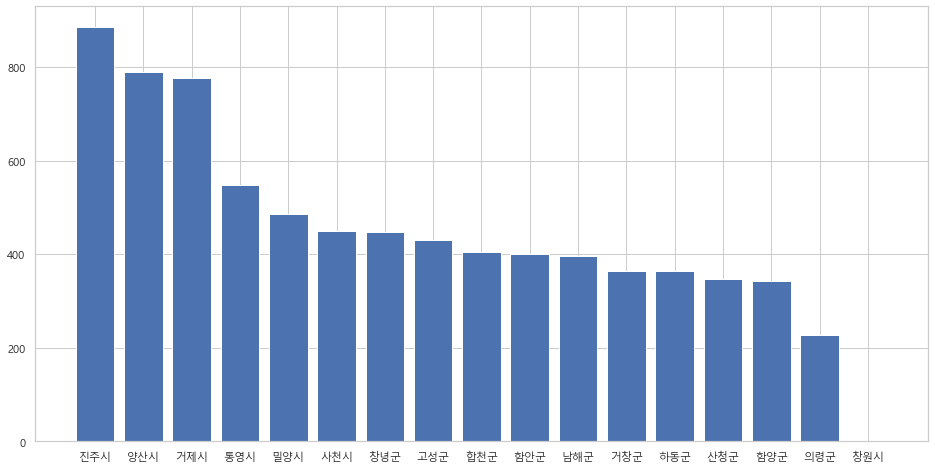

In [15]:
table = pd.crosstab(np.array(df[:number_of_train_data]['시군구']), np.array(y_train["화재발생"]))
table = table.iloc[:,1].sort_values(ascending=False)
plt.figure(figsize=(16,8))
plt.bar(table.index, table.values)
plt.show()

- 창원시의 경우 화재발생이 한 건도 없는 것을 볼 수 있다. -> 창원시는 삭제한다.

In [16]:
table = pd.crosstab(np.array(df[:number_of_train_data]['시군구']), np.array(y_train["화재발생"]))

In [17]:
len(np.where(df["시군구"] == "창원시")[0])

8442

In [18]:
df = df.drop(np.where(df["시군구"] == "창원시")[0])
df = df.reset_index(drop=True)

In [19]:
number_of_train_data -= 8442
y_train = df[:number_of_train_data][["화재발생"]]
y_train_onehot = pd.get_dummies(df[:number_of_train_data][["화재발생"]])

## 결측치 확인

In [20]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
lw_13121011          50560  0.996197
lw_13121010          50560  0.996197
lw_13111110          50553  0.996059
lw_13101410          50550  0.996000
lw_13141011          50545  0.995902
lw_13101310          50544  0.995882
lw_13141010          50543  0.995862
lw_13101110          50543  0.995862
lw_13131110          50540  0.995803
lw_13131010          50540  0.995803
lw_13101210          50539  0.995784
lw_13101211          50538  0.995764
lw_13111010          50536  0.995724
lw_13101010          50534  0.995685
gas_engry_us_201801  46995  0.925955
gas_engry_us_201603  46995  0.925955
gas_engry_us_201602  46995  0.925955
gas_engry_us_201604  46995  0.925955
gas_engry_us_201712  46995  0.925955
gas_engry_us_201601  46995  0.925955

- 결측치의 비율이 상당히 높은 것을 확인
- 90퍼센트 이상인 특성들 확인해본다

In [21]:
missing_data[missing_data["Percent"] > 0.9].index

Index(['lw_13121011', 'lw_13121010', 'lw_13111110', 'lw_13101410',
       'lw_13141011', 'lw_13101310', 'lw_13141010', 'lw_13101110',
       'lw_13131110', 'lw_13131010', 'lw_13101210', 'lw_13101211',
       'lw_13111010', 'lw_13101010', 'gas_engry_us_201801',
       'gas_engry_us_201603', 'gas_engry_us_201602', 'gas_engry_us_201604',
       'gas_engry_us_201712', 'gas_engry_us_201601', 'gas_engry_us_201512',
       'gas_engry_us_201508', 'gas_engry_us_201511', 'gas_engry_us_201510',
       'gas_engry_us_201802', 'gas_engry_us_201509', 'gas_engry_us_201605',
       'gas_engry_us_201803', 'gas_engry_us_201507', 'gas_engry_us_201711',
       'gas_engry_us_201609', 'gas_engry_us_201606', 'gas_engry_us_201612',
       'gas_engry_us_201704', 'gas_engry_us_201706', 'gas_engry_us_201703',
       'gas_engry_us_201702', 'gas_engry_us_201701', 'gas_engry_us_201707',
       'gas_engry_us_201611', 'gas_engry_us_201710', 'gas_engry_us_201708',
       'gas_engry_us_201610', 'gas_engry_us_201804', 'g

- lw 와 gas , 강수량 특성들은 결측치가 90퍼센트가 넘어간다.

### lw

In [22]:
df["lw_13121011"].unique()

array([       nan, 0.        , 4.        , 3.        , 2.        ,
       1.85714286, 2.73684211, 3.46666667, 2.28571429, 1.8       ,
       3.25      , 1.94117647, 3.59090909, 2.4       ])

In [23]:
temp_df = df["lw_13121011"].isnull()
temp_df = pd.merge(pd.get_dummies(temp_df), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

False      True    화재발생_N    화재발생_Y
False   1.000000 -1.000000 -0.092026  0.092026
True   -1.000000  1.000000  0.092026 -0.092026
화재발생_N -0.092026  0.092026  1.000000 -1.000000
화재발생_Y  0.092026 -0.092026 -1.000000  1.000000

In [24]:
temp_df = pd.DataFrame(df["lw_13121011"].fillna(0))
temp_df = pd.merge(temp_df, y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

lw_13121011  화재발생_N  화재발생_Y
lw_13121011       1.0000 -0.0287  0.0287
화재발생_N           -0.0287  1.0000 -1.0000
화재발생_Y            0.0287 -1.0000  1.0000

In [25]:
temp_df["lw_isnull"] = df["lw_13121011"].isnull()
temp_df = pd.merge(pd.get_dummies(temp_df[["lw_isnull"]]), y_train_onehot, left_index=True, right_index=True)
print("lw 값이 없을 때 화재발생_N의 비율 :", len(np.where((temp_df["lw_isnull"] == True) & (temp_df["화재발생_N"] == 1))[0]) / len(temp_df))

lw 값이 없을 때 화재발생_N의 비율 : 0.8479498748842433


- Null값일 때 화재발생이 일어나지 않은 경우가 많으므로 Null 값인지 아닌지에 대한 특성 만들어준다

In [26]:
lw_col_names = [col_name for col_name in df.columns.tolist() if "lw" in col_name ]
lw_df = df[lw_col_names]
df["lw_isnull"] = lw_df.isnull().T.sum() > 0

In [27]:
temp_df = pd.merge(df[["lw_isnull"]], y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

lw_isnull    화재발생_N    화재발생_Y
lw_isnull   1.000000  0.091503 -0.091503
화재발생_N      0.091503  1.000000 -1.000000
화재발생_Y     -0.091503 -1.000000  1.000000

### gas

In [28]:
df["gas_engry_us_201603"].unique()

array([nan,  0.])

- 가스 에너지 사용량인데 0밖에 없다?

In [29]:
temp_df = pd.DataFrame(df["gas_engry_us_201603"].fillna("NA"))
temp_df = pd.merge(pd.get_dummies(temp_df[["gas_engry_us_201603"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

gas_engry_us_201603_0.0  gas_engry_us_201603_NA  \
gas_engry_us_201603_0.0                 1.000000               -1.000000   
gas_engry_us_201603_NA                 -1.000000                1.000000   
화재발생_N                                 -0.111245                0.111245   
화재발생_Y                                  0.111245               -0.111245   

                           화재발생_N    화재발생_Y  
gas_engry_us_201603_0.0 -0.111245  0.111245  
gas_engry_us_201603_NA   0.111245 -0.111245  
화재발생_N                   1.000000 -1.000000  
화재발생_Y                  -1.000000  1.000000

In [30]:
temp_df["gas_isnull"] = df["gas_engry_us_201603"].isnull()
temp_df = pd.merge(pd.get_dummies(temp_df[["gas_isnull"]]), y_train_onehot, left_index=True, right_index=True)
print("gas 값이 없을 때 화재발생_N의 비율 :", len(np.where((temp_df["gas_isnull"] == True) & (temp_df["화재발생_N"] == 1))[0]) / len(temp_df))

gas 값이 없을 때 화재발생_N의 비율 : 0.7967016728075188


- gas 역시 Null값일 때 화재발생이 일어나지 않은 경우가 많으므로 Null 값인지 아닌지에 대한 특성 만들어준다

In [31]:
gas_col_names = [col_name for col_name in df.columns.tolist() if "gas_engry" in col_name ]
gas_df = df[gas_col_names]
df["gas_isnull"] = gas_df.isnull().T.sum() > 0

In [32]:
temp_df = pd.merge(df[["gas_isnull"]], y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

gas_isnull    화재발생_N    화재발생_Y
gas_isnull    1.000000  0.111245 -0.111245
화재발생_N        0.111245  1.000000 -1.000000
화재발생_Y       -0.111245 -1.000000  1.000000

### 강수량

In [33]:
df["강수량"].unique()

array([ nan,  0.5,  0.4,  0.8,  0.6,  6.4,  2. ,  0. , 25. ,  0.7,  1.5,
        3.6,  5. ,  1. ,  1.2,  0.2,  0.3,  7. ,  2.9,  6.8,  3. ,  1.8,
        0.1,  2.5,  1.1, 11.2,  2.3,  3.1,  4.5,  8.2,  1.4,  3.7,  1.9,
        8.5,  1.6,  4.1, 11.8,  7.5,  9.5,  2.2,  5.1,  1.7,  0.9,  2.1,
        6.5,  3.5,  9.7,  1.3,  2.4, 10. , 11.5,  4.7,  4. , 11.1,  3.4,
        2.8,  3.3, 14.1, 17.7,  5.5, 14.5, 17.5, 26. , 93. ,  6. ,  8.6,
       21.5,  7.7,  8. , 13.5, 30.5, 10.4, 28.5, 13. ,  4.3, 37. , 15. ,
        9. , 34. , 12. ,  3.2, 15.3, 10.5, 14. ,  5.4, 16. , 16.5, 26.5,
       12.5, 17.4, 18.5, 18. , 35.5, 11. ,  9.2,  6.7, 39.5, 27. , 11.6,
       40.5, 10.8,  3.9, 24. , 43.5, 24.5, 20. , 20.5, 22. , 15.8,  4.4,
       19.5,  3.8,  5.2, 19.7, 18.1,  6.1, 19. ,  9.3,  5.3,  6.2,  6.3,
        5.6, 10.1,  5.8,  2.7, 11.7, 30.3,  4.2,  4.9, 26.6, 13.2, 10.2,
        7.6, 19.2,  8.7,  9.8, 10.3, 23.1,  4.8, 15.4,  8.1, 15.1,  4.6,
        7.3, 13.7, 25.5, 15.5, 17. , 22.5, 33.5, 33

In [34]:
temp_df = pd.DataFrame(df["강수량"].fillna(0))
temp_df = pd.merge(temp_df, y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

강수량    화재발생_N    화재발생_Y
강수량     1.000000  0.002188 -0.002188
화재발생_N  0.002188  1.000000 -1.000000
화재발생_Y -0.002188 -1.000000  1.000000

In [35]:
temp_df = df["강수량"].isnull()
temp_df = pd.merge(pd.get_dummies(temp_df), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

False      True    화재발생_N    화재발생_Y
False   1.000000 -1.000000  0.036559 -0.036559
True   -1.000000  1.000000 -0.036559  0.036559
화재발생_N  0.036559 -0.036559  1.000000 -1.000000
화재발생_Y -0.036559  0.036559 -1.000000  1.000000

- 상관관계가 매우 낮다 -> 제거

In [36]:
df = df.drop(missing_data[missing_data["Percent"] > 0.9].index, axis=1)

In [37]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
ele_engry_us_201703  37775  0.744291
ele_engry_us_201506  37775  0.744291
ele_engry_us_201508  37775  0.744291
ele_engry_us_201509  37775  0.744291
ele_engry_us_201510  37775  0.744291
ele_engry_us_201511  37775  0.744291
ele_engry_us_201512  37775  0.744291
ele_engry_us_201601  37775  0.744291
ele_engry_us_201602  37775  0.744291
ele_engry_us_201603  37775  0.744291
ele_engry_us_201604  37775  0.744291
ele_engry_us_201605  37775  0.744291
ele_engry_us_201606  37775  0.744291
ele_engry_us_201607  37775  0.744291
ele_engry_us_201608  37775  0.744291
ele_engry_us_201609  37775  0.744291
ele_engry_us_201610  37775  0.744291
ele_engry_us_201611  37775  0.744291
ele_engry_us_201612  37775  0.744291
ele_engry_us_201701  37775  0.744291

### ele

In [38]:
df["ele_engry_us_201609"].unique()

array([nan,  0.])

- 전기 에너지 사용량인데 0밖에 없다?

In [39]:
temp_df = pd.DataFrame(df["ele_engry_us_201609"].fillna("NA"))
temp_df = pd.merge(pd.get_dummies(temp_df[["ele_engry_us_201609"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

ele_engry_us_201609_0.0  ele_engry_us_201609_NA  \
ele_engry_us_201609_0.0                 1.000000               -1.000000   
ele_engry_us_201609_NA                 -1.000000                1.000000   
화재발생_N                                 -0.162824                0.162824   
화재발생_Y                                  0.162824               -0.162824   

                           화재발생_N    화재발생_Y  
ele_engry_us_201609_0.0 -0.162824  0.162824  
ele_engry_us_201609_NA   0.162824 -0.162824  
화재발생_N                   1.000000 -1.000000  
화재발생_Y                  -1.000000  1.000000

In [40]:
temp_df["ele_isnull"] = df["ele_engry_us_201609"].isnull()
temp_df = pd.merge(pd.get_dummies(temp_df[["ele_isnull"]]), y_train_onehot, left_index=True, right_index=True)
print("ele 값이 없을 때 화재발생_N의 비율 :", len(np.where((temp_df["ele_isnull"] == True) & (temp_df["화재발생_N"] == 1))[0]) / len(temp_df))

ele 값이 없을 때 화재발생_N의 비율 : 0.6574389691249778


In [41]:
ele_col_names = [col_name for col_name in df.columns.tolist() if "ele_engry" in col_name ]
ele_df = df[ele_col_names]
df["ele_isnull"] = ele_df.isnull().T.sum() > 0

In [42]:
temp_df = pd.merge(df[["ele_isnull"]], y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

ele_isnull    화재발생_N    화재발생_Y
ele_isnull    1.000000  0.162824 -0.162824
화재발생_N        0.162824  1.000000 -1.000000
화재발생_Y       -0.162824 -1.000000  1.000000

- ele Null 값에 대한 N의 비율은 적었지만 상관관계는 가장 높게 나왔다

In [43]:
missing_data.head(60)

Total   Percent
ele_engry_us_201703  37775  0.744291
ele_engry_us_201506  37775  0.744291
ele_engry_us_201508  37775  0.744291
ele_engry_us_201509  37775  0.744291
ele_engry_us_201510  37775  0.744291
ele_engry_us_201511  37775  0.744291
ele_engry_us_201512  37775  0.744291
ele_engry_us_201601  37775  0.744291
ele_engry_us_201602  37775  0.744291
ele_engry_us_201603  37775  0.744291
ele_engry_us_201604  37775  0.744291
ele_engry_us_201605  37775  0.744291
ele_engry_us_201606  37775  0.744291
ele_engry_us_201607  37775  0.744291
ele_engry_us_201608  37775  0.744291
ele_engry_us_201609  37775  0.744291
ele_engry_us_201610  37775  0.744291
ele_engry_us_201611  37775  0.744291
ele_engry_us_201612  37775  0.744291
ele_engry_us_201701  37775  0.744291
ele_engry_us_201702  37775  0.744291
ele_engry_us_201801  37775  0.744291
ele_engry_us_201704  37775  0.744291
ele_engry_us_201705  37775  0.744291
ele_engry_us_201706  37775  0.744291
ele_engry_us_201707  37775  0.744291
ele_engry_us_201708  37775  0.744291
ele_engry_us_201709  37775  0.744291
ele_engry_us_201710  37775  0.744291
ele_engry_us_201507  37775  0.744291
ele_engry_us_201505  37775  0.744291
ele_engry_us_201712  37775  0.744291
ele_engry_us_201504  37775  0.744291
ele_engry_us_201812  37775  0.744291
ele_engry_us_201811  37775  0.744291
ele_engry_us_201810  37775  0.744291
ele_engry_us_201809  37775  0.744291
ele_engry_us_201808  37775  0.744291
ele_engry_us_201807  37775  0.744291
ele_engry_us_201806  37775  0.744291
ele_engry_us_201805  37775  0.744291
ele_engry_us_201804  37775  0.744291
ele_engry_us_201803  37775  0.744291
ele_engry_us_201802  37775  0.744291
ele_engry_us_201401  37775  0.744291
ele_engry_us_201402  37775  0.744291
ele_engry_us_201403  37775  0.744291
ele_engry_us_201404  37775  0.744291
ele_engry_us_201405  37775  0.744291
ele_engry_us_201406  37775  0.744291
ele_engry_us_201407  37775  0.744291
ele_engry_us_201408  37775  0.744291
ele_engry_us_201409  37775  0.744291
ele_engry_us_201410  37775  0.744291
ele_engry_us_201411  37775  0.744291
ele_engry_us_201412  37775  0.744291
ele_engry_us_201501  37775  0.744291
ele_engry_us_201502  37775  0.744291
ele_engry_us_201503  37775  0.744291
ele_engry_us_201711  37775  0.744291

In [44]:
df = df.drop(missing_data.head(60).index[:], axis=1)
df_train = df_train.drop(missing_data.head(60).index[:], axis=1)

In [45]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
건물용도분류명   25175  0.496030
건물용도      23707  0.467105
건물구조      23692  0.466810
건물승인일자    23620  0.465391
건물면적당가격   19231  0.378914
건물들지하층수합   9758  0.192264
건물들지상층수합   8994  0.177211
토지이용상황명     989  0.019487
도로측면명       711  0.014009
용도지역지구명     711  0.014009
용도지역지구명2    711  0.014009
행정구역인구      512  0.010088
풍향          179  0.003527
관할소방서인원      33  0.000650
풍속           33  0.000650
습도           22  0.000433
온도           13  0.000256
년도            0  0.000000
날짜            0  0.000000
시간            0  0.000000

- 결측치의 비율이 높은 범주형 데이터는 NA 범주 생성해주고, 결측치의 비율이 적은것과 numeric 데이터들은 유의미한 근거로 결측값을 채워준다.

### 건물용도분류명

In [46]:
df["건물용도분류명"].unique()

array([nan, '공공용', '주거용', '상업용', '공업용', '문교사회용', '농수산용', '기타'],
      dtype=object)

In [47]:
df["건물용도분류명"] = df["건물용도분류명"].fillna("NA")

In [48]:
temp_df = pd.merge(pd.get_dummies(df[["건물용도분류명"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

건물용도분류명_NA  건물용도분류명_공공용  건물용도분류명_공업용  건물용도분류명_기타  건물용도분류명_농수산용  \
건물용도분류명_NA       1.000000    -0.024526    -0.136136   -0.190731     -0.152464   
건물용도분류명_공공용     -0.024526     1.000000    -0.003392   -0.004753     -0.003799   
건물용도분류명_공업용     -0.136136    -0.003392     1.000000   -0.026381     -0.021088   
건물용도분류명_기타      -0.190731    -0.004753    -0.026381    1.000000     -0.029545   
건물용도분류명_농수산용    -0.152464    -0.003799    -0.021088   -0.029545      1.000000   
건물용도분류명_문교사회용   -0.108146    -0.002695    -0.014958   -0.020957     -0.016752   
건물용도분류명_상업용     -0.315820    -0.007870    -0.043683   -0.061201     -0.048922   
건물용도분류명_주거용     -0.684332    -0.017053    -0.094654   -0.132613     -0.106006   
화재발생_N           0.368268    -0.027460    -0.180055   -0.051702     -0.048900   
화재발생_Y          -0.368268     0.027460     0.180055    0.051702      0.048900   

               건물용도분류명_문교사회용  건물용도분류명_상업용  건물용도분류명_주거용    화재발생_N    화재발생_Y  
건물용도분류명_NA         -0.108146    -0.315820    -0.684332  0.368268 -0.368268  
건물용도분류명_공공용        -0.002695    -0.007870    -0.017053 -0.027460  0.027460  
건물용도분류명_공업용        -0.014958    -0.043683    -0.094654 -0.180055  0.180055  
건물용도분류명_기타         -0.020957    -0.061201    -0.132613 -0.051702  0.051702  
건물용도분류명_농수산용       -0.016752    -0.048922    -0.106006 -0.048900  0.048900  
건물용도분류명_문교사회용       1.000000    -0.034701    -0.075192 -0.088457  0.088457  
건물용도분류명_상업용        -0.034701     1.000000    -0.219585 -0.224657  0.224657  
건물용도분류명_주거용        -0.075192    -0.219585     1.000000 -0.145072  0.145072  
화재발생_N             -0.088457    -0.224657    -0.145072  1.000000 -1.000000  
화재발생_Y              0.088457     0.224657     0.145072 -1.000000  1.000000

### 건물용도

In [49]:
df["건물용도"].unique()

array([nan, '업무시설', '단독주택', '위험물저장및처리시설', '공동주택', '제1종근린생활시설', '공장',
       '제2종근린생활시설', '노유자시설', '운동시설', '동.식물 관련시설', '창고시설', '의료시설', '위락시설',
       '자동차관련시설', '종교시설', '근린생활시설', '분뇨.쓰레기처리시설', '숙박시설', '교육연구시설',
       '발전시설', '관광휴게시설', '판매시설', '수련시설', '문화및집회시설', '묘지관련시설', '방송통신시설',
       '장례식장', '운수시설', '교정및군사시설', '교육연구및복지시설', '공공용시설'], dtype=object)

In [50]:
df["건물용도"] = df["건물용도"].fillna("NA")

### 건물구조

In [51]:
df["건물구조"].unique()

array([nan, '철근콘크리트구조', '블록구조', '벽돌구조', '경량철골구조', '일반목구조', '일반철골구조',
       '기타구조', '강파이프구조', '조적구조', '석구조', '기타조적구조', '통나무구조', '철골콘크리트구조',
       '철골철근콘크리트구조', '기타강구조', '프리케스트콘크리트구조', '목구조', '기타콘크리트구조'],
      dtype=object)

In [52]:
# 목구조, 콘크리트구조, 벽돌구조, 철골구조, 조적구조 묶어주기
df['건물구조'] = ['목구조' if x in ['일반목구조','통나무구조','목구조'] else '콘크리트구조' if x in ['철근콘크리트구조','철골콘크리트구조','철골철근콘크리트구조',\
     '프리케스트콘크리트구조','기타콘크리트구조'] else '벽돌구조' if x in ['블록구조','벽돌구조'] else '철골구조' if x in ['경량철골구조', '일반철골구조'] 
     else '조적구조' if x in ['조적구조', '기타조적구조'] else x for x in df['건물구조']]

In [53]:
df['건물구조'].unique()

array([nan, '콘크리트구조', '벽돌구조', '철골구조', '목구조', '기타구조', '강파이프구조', '조적구조',
       '석구조', '기타강구조'], dtype=object)

In [54]:
df["건물구조"] = df["건물구조"].fillna("NA")

### 건물승인일자

In [55]:
df["건물승인일자"]

0               NaN
1        19881010.0
2        19650101.0
3        20020129.0
4               NaN
            ...    
57646    19790528.0
57647           NaN
57648    20081209.0
57649    20090915.0
57650    20010120.0
Name: 건물승인일자, Length: 57651, dtype: object

- 건물승인일자가 년,월,일이 나와있지만 중요한것은 년도라고 생각함 -> 년도만 남긴다.

In [56]:
df["건물승인일자"] = df["건물승인일자"].fillna(9999)
# 년도만 남기기
df["건물승인일자"] = df["건물승인일자"].astype(str).map(lambda x: x[0:4])

In [57]:
np.sort(df['건물승인일자'].unique())

array(['1646', '1740', '1750', '1751', '1790', '1800', '1811', '1819',
       '1820', '1821', '1840', '1843', '1850', '1852', '1855', '1860',
       '1861', '1862', '1863', '1865', '1866', '1867', '1870', '1871',
       '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1880',
       '1881', '1882', '1883', '1884', '1885', '1887', '1889', '1890',
       '1891', '1892', '1893', '1894', '1895', '1896', '1899', '1900',
       '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908',
       '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916',
       '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924',
       '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932',
       '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948',
       '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964',
      

In [58]:
df["건물승인일자"] = df["건물승인일자"].astype(int).map(lambda x: x if x < 2020 else 0)

In [59]:
df["건물승인일자"].unique()

array([   0, 1988, 1965, 2002, 2000, 1983, 1972, 2006, 2010, 1996, 2009,
       1940, 1995, 1979, 2004, 2011, 1970, 1955, 1975, 1935, 1946, 1997,
       1999, 2007, 2008, 2012, 1993, 1978, 2005, 2003, 1945, 2015, 1981,
       2013, 2016, 1971, 1926, 1930, 1910, 1998, 1992, 1973, 1952, 1976,
       1994, 2001, 1990, 1915, 1927, 1950, 1984, 1960, 1904, 1919, 1922,
       1991, 1934, 1967, 1987, 1963, 1941, 1925, 1982, 1949, 1880, 1929,
       1958, 1986, 1957, 1974, 1924, 2018, 1977, 1969, 2014, 1968, 1985,
       1943, 1931, 1948, 1951, 1923, 1894, 1912, 1800, 1956, 1920, 1932,
       1918, 1980, 1944, 1911, 1933, 1871, 1937, 1882, 1962, 1903, 1966,
       2017, 1954, 1900, 1989, 1942, 1939, 1936, 1905, 1896, 1893, 1890,
       1901, 1961, 1914, 1964, 1908, 1938, 1870, 1959, 1866, 1875, 1928,
       1947, 1865, 1821, 1861, 1867, 1907, 1887, 1874, 1840, 1820, 1921,
       1819, 1850, 1891, 1877, 1895, 1953, 1916, 1646, 1878, 1909, 1876,
       1883, 1884, 1892, 1862, 1902, 1913, 1906, 19

- 건물승인년도를 50년도씩 끊어서 범주화 시켜주었다.

In [60]:
df["건물승인일자_년대"] = df["건물승인일자"].astype(int).map(lambda x: "2000s" if x >= 2000 else "1950s" if x >= 1950 else "1900s" 
                                               if x >= 1900 else "1850s" if x >= 1850 else "1800s" if x >= 1800 else "1750s" 
                                               if x >= 1750 else "1700s" if x >= 1700 else "1600s" if x >= 1600 else "NA")

df["건물승인일자_년대"].unique()

array(['NA', '1950s', '2000s', '1900s', '1850s', '1800s', '1600s',
       '1700s', '1750s'], dtype=object)

In [61]:
df = df.drop('건물승인일자', axis=1)

### 건물면적당가격

In [62]:
df['건물면적당가격']

0         478038.0
1              NaN
2         671829.0
3              NaN
4         522466.0
           ...    
57646    1251550.0
57647    3678586.0
57648          NaN
57649          NaN
57650          NaN
Name: 건물면적당가격, Length: 57651, dtype: float64

#### 행정구역명의 평균값으로 채워주기
- 같은 지역에 있으면 그 값이 비슷할 것이다.

In [63]:
df["건물면적당가격"] = df.groupby("행정구역명")["건물면적당가격"].transform(lambda x: x.fillna(x.mean()))
df["건물면적당가격"] = df["건물면적당가격"].transform(lambda x: x.fillna(x.mean()))

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격', ylabel='Density'>

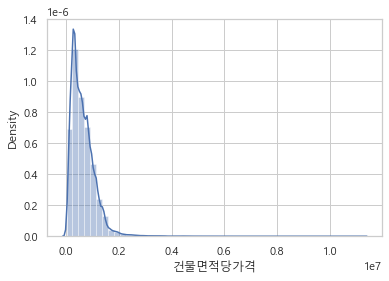

In [64]:
sns.distplot(df["건물면적당가격"], bins=50)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격_log', ylabel='Density'>

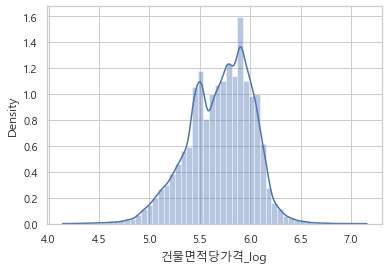

In [65]:
# log transform
df["건물면적당가격_log"] = np.log10(df["건물면적당가격"]+0.5)
sns.distplot(df["건물면적당가격_log"], bins=50)

- 값이 한쪽으로 치우쳐져있으므로 log transform 한 것이 더 학습시키기에 좋다.

In [66]:
df = df.drop("건물면적당가격", axis=1)

### 건물들지하층수합

In [67]:
df['건물들지하층수합'].unique()

array([ 0., nan,  6.,  1.,  3.,  9.,  4.,  5.,  2., 15., 10., 30.,  7.,
       18., 11., 14., 13., 17.,  8., 23., 16., 36., 12.])

<AxesSubplot:xlabel='건물들지하층수합', ylabel='화재발생'>

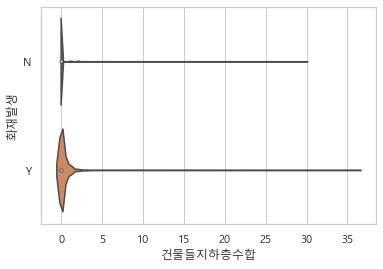

In [68]:
sns.violinplot(x='건물들지하층수합', y="화재발생", data=df)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물들지하층수합', ylabel='Density'>

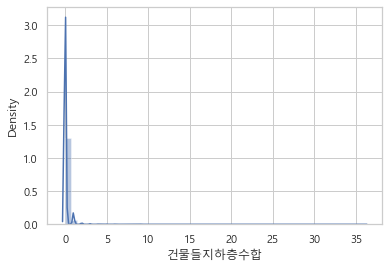

In [69]:
sns.distplot(df["건물들지하층수합"], bins=50)

- 건물들지하층수합은 데이터가 많이 쏠려있고, numeric 데이터로 보기보다 범주를 나누어서 범주형 데이터로 보는것이 유리하다고 판단

In [70]:
len(df[df["건물들지하층수합"] < 10])/len(df)

0.8127352517736033

In [71]:
df['지하범주'] = ['깊지않은' if x < 10 else "깊은" if x >= 10 else "NA" for x in df['건물들지하층수합']]

### 건물들지상층수합

In [72]:
df['건물들지상층수합'].unique()

array([  1.,   5.,   2.,  nan, 200.,  15.,   3.,   4.,   6.,  10.,   7.,
       131.,  95.,   8.,  16.,  62.,  91.,  17.,   0.,  33.,  13.,   9.,
        18.,  14.,  47.,  54.,  11.,  19.,  27.,  45.,  21.,  20.,  82.,
       184.,  93.,  22.,  80.,  32., 256., 351.,  48., 189., 312., 100.,
        55., 124., 182., 172., 138., 151.,  30., 533., 197., 229., 144.,
       196., 132.,  96.,  63.,  64., 270.,  78., 193.,  89., 395., 216.,
       178.,  68., 164., 139.,  24., 149.,  43.,  65.,  52., 191., 221.,
       224., 186., 163., 413.,  44., 386., 201.,  94., 143.,  69.,  26.,
        66.,  25.,  23.,  12.,  41.,  86.,  97., 103., 444., 127., 241.,
       171.,  35.,  28.,  29., 129.,  40.,  59., 126.,  39.,  75., 285.,
        90., 102.,  88.,  60.,  72.,  51., 105.,  71.,  84., 152.,  77.,
       253., 180., 118.,  31.,  81., 343.,  76.,  37., 123., 369.,  46.,
       165., 183.,  92., 223., 244., 167.,  85., 133.,  38.,  34., 306.,
       293., 177.,  99., 208.,  49.,  87., 303., 11

<AxesSubplot:xlabel='건물들지상층수합', ylabel='화재발생'>

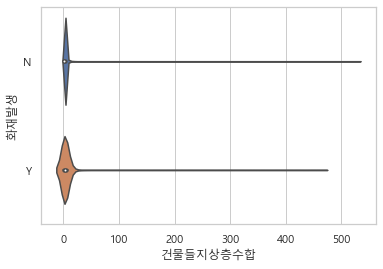

In [73]:
sns.violinplot(x='건물들지상층수합', y="화재발생", data=df)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물들지상층수합', ylabel='Density'>

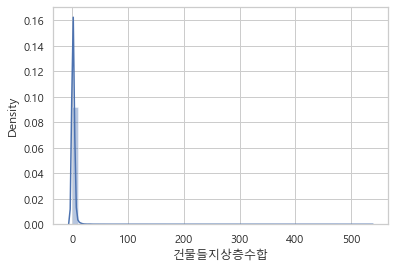

In [74]:
sns.distplot(df["건물들지상층수합"], bins=50)

- 건물들지상층수합 역시 데이터가 많이 쏠려있고, numeric 데이터로 보기보다 범주를 나누어서 범주형 데이터로 보는것이 유리하다고 판단

In [75]:
len(df[df["건물들지상층수합"] < 15])/len(df)

0.8162911311165462

In [76]:
df['지상범주'] = ['초고층' if x >= 100 else "고층" if x >= 15 else "저층" if x < 15 else "NA" for x in df['건물들지상층수합']]

In [77]:
df = df.drop(['건물들지하층수합','건물들지상층수합'], axis=1)

In [78]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

Total   Percent
토지이용상황명     989  0.019487
용도지역지구명2    711  0.014009
도로측면명       711  0.014009
용도지역지구명     711  0.014009
행정구역인구      512  0.010088
풍향          179  0.003527
관할소방서인원      33  0.000650
풍속           33  0.000650
습도           22  0.000433
온도           13  0.000256
년도            0  0.000000

### 토지이용상황명, 도로측면명, 용도지역지구명

In [79]:
df['토지이용상황명'].unique()

array(['단독', '업무용', '상업용', '아파트', '주상용', '주거기타', '주거나지', '주상기타', '운동장등',
       '도로등', '전기타', '다세대', '공업용', '연립', '상업기타', '답', '과수원', '전', nan,
       '답기타', '공업기타', '자연림', '상업나지', '하천등', '공업나지', '토지임야', '주차장등',
       '임야기타', '공원등', '주상나지', '조림', '여객자동차터미널', '유해.혐오시설', '골프장 대중제',
       '기타', '골프장 회원제', '목장용지', '스키장', '공원묘지', '유원지', '고속도로휴게소', '위험시설',
       '특수기타', '발전소', '콘도미니엄', '경마장'], dtype=object)

In [80]:
df['도로측면명'].unique()

array(['세로한면(불)', '중로한면', '소로한면', '세로한면(가)', '소로각지', '맹지', '세로각지(가)',
       '세로각지(불)', '중로각지', nan, '광대로한면', '광대소각', '지정되지않음', '광대세각'],
      dtype=object)

In [81]:
df['용도지역지구명'].unique()

array(['자연녹지지역', '제2종일반주거지역', '생산녹지지역', '계획관리지역', '제1종일반주거지역', '보전녹지지역',
       '자연환경보전지역', '생산관리지역', '농림지역', '보전관리지역', '준공업지역', '일반공업지역',
       '일반상업지역', nan, '중심상업지역', '제3종일반주거지역', '준주거지역', '개발제한구역',
       '제1종전용주거지역', '관리지역', '근린상업지역', '제2종전용주거지역', '용도미지정', '유통상업지역'],
      dtype=object)

In [82]:
df['용도지역지구명2'].unique()

array(['지정되지않음', '생산녹지지역', '자연녹지지역', '제2종일반주거지역', '보전녹지지역', '계획관리지역',
       '자연환경보전지역', nan, '준주거지역', '일반상업지역', '생산관리지역', '보전관리지역',
       '제1종일반주거지역', '농림지역', '제3종일반주거지역', '일반공업지역', '관리지역', '준공업지역',
       '근린상업지역', '개발제한구역'], dtype=object)

- 용도지역지구명2는 용도지역지구명과 비슷하고 크게 의미 없을것으로 판단. 제거한다.

In [83]:
df = df.drop('용도지역지구명2', axis=1)

- 나머지 데이터들은 같은 지적상지목에서의 가장많이 나온 값으로 채워넣어주고, 그렇게 해도 없다면 그 특성중 가장 많이 나온 값으로 넣어준다.

In [84]:
df['토지이용상황명'] = df.groupby(['지적상지목'])['토지이용상황명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['도로측면명'] = df.groupby(['지적상지목'])['도로측면명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['용도지역지구명'] = df.groupby(['지적상지목'])['용도지역지구명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['토지이용상황명'] = df['토지이용상황명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['도로측면명'] = df['도로측면명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['용도지역지구명'] = df['용도지역지구명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))

### 행정구역인구
- 행정구역인구는 같은 행정구역에서의 같은 년도의 평균값을 넣어주고, 그래도 빈 값은 같은 구역의 평균값, 시군구의 같은 년도의 평균값, 시군구의 평균값으로 넣어준다.

In [85]:
df['행정구역인구'] = df.groupby(["행정구역명","년도"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["행정구역명"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["시군구","년도"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["시군구"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))

df['행정구역인구'].isnull().sum()

0

### 풍향, 풍속, 습도, 온도
- 이 데이터들은 결측치가 적고, 같은 지역의 같은 날짜에서 채워주었다.

In [86]:
np.sort(df["풍향"].unique())

array([  0.,   2.,  11.,  18.,  20.,  23.,  29.,  32.,  34.,  36.,  50.,
        70.,  90., 110., 140., 160., 180., 200., 230., 250., 270., 290.,
       320., 340., 360.,  nan])

- 각도를 나누어서 동서남북으로 바꿔주었다.

In [87]:
df['풍향'] = ['북' if x >= 315 or x < 45 else "동" if x < 135 else "남" if x < 225
            else "서" if x < 315 else np.nan for x in df['풍향']]

df['풍향'] = df.groupby(["행정구역명","날짜"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["시군구","날짜"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["행정구역명","년도","월"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["시군구","년도","월"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))

df['풍향'].isnull().sum()

0

In [88]:
np.sort(df["풍속"].unique())

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.2,  9.3,  9.4,  9.6,  9.7,  9.8,  9.9, 10. ,
       10.1, 10.5, 10.6, 10.7, 10.8, 11. , 11.1, 11.2, 11.4, 11.5, 11.8,
       12. , 12.1, 14.9, 15.3,  nan])

In [89]:
df['풍속'] = df.groupby(["행정구역명","날짜"])['풍속'].transform(lambda x: x.fillna(x.mean()))
df['풍속'] = df.groupby(["시군구","날짜"])['풍속'].transform(lambda x: x.fillna(x.mean()))
df['풍속'] = df.groupby(["행정구역명","년도","월"])['풍속'].transform(lambda x: x.fillna(x.mean()))

df['풍속'].isnull().sum()

0

In [90]:
np.sort(df["습도"].unique())

array([  0. ,   4. ,   6. ,   7. ,   8. ,   9. ,  10. ,  11. ,  12. ,
        13. ,  14. ,  15. ,  16. ,  17. ,  18. ,  19. ,  20. ,  21. ,
        22. ,  23. ,  24. ,  25. ,  26. ,  27. ,  28. ,  28.9,  29. ,
        30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  35.6,  36. ,  37. ,
        38. ,  39. ,  40. ,  40.7,  41. ,  42. ,  43. ,  44. ,  45. ,
        46. ,  47. ,  48. ,  49. ,  50. ,  51. ,  52. ,  53. ,  54. ,
        55. ,  56. ,  57. ,  58. ,  59. ,  60. ,  61. ,  62. ,  63. ,
        64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  69.9,  70. ,  71. ,
        72. ,  73. ,  73.4,  74. ,  75. ,  76. ,  77. ,  78. ,  79. ,
        80. ,  81. ,  82. ,  83. ,  83.5,  84. ,  85. ,  86. ,  87. ,
        88. ,  89. ,  90. ,  91. ,  92. ,  93. ,  94. ,  95. ,  96. ,
        97. ,  98. ,  99. , 100. ,   nan])

In [91]:
df['습도'] = df.groupby(["행정구역명","날짜"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["시군구","날짜"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["행정구역명","년도","월"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["시군구","년도","월"])['습도'].transform(lambda x: x.fillna(x.mean()))

df['습도'].isnull().sum()

0

In [92]:
np.sort(df["온도"].unique())

array([-14.1, -13.2, -13.1, -12.7, -12.5, -12.2, -12.1, -11.9, -11.8,
       -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11. , -10.9,
       -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10. ,
        -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,  -9.1,
        -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,  -8.2,
        -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,  -7.3,
        -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,  -6.4,
        -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,  -5.5,
        -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,  -4.6,
        -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,  -3.7,
        -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,  -2.8,
        -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,  -1.9,
        -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,  -1. ,
        -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,  -0.1,
         0. ,   0.1,

In [93]:
df['온도'] = df.groupby(["행정구역명","날짜"])['온도'].transform(lambda x: x.fillna(x.mean()))
df['온도'] = df.groupby(["시군구","날짜"])['온도'].transform(lambda x: x.fillna(x.mean()))
df['온도'] = df.groupby(["행정구역명","년도","월"])['온도'].transform(lambda x: x.fillna(x.mean()))

df['온도'].isnull().sum()

0

### 관할소방서인원
- 이 데이터 역시 결측치가 적다.
- 같은 지역 같은 년도의 평균값을 넣어준다.

In [94]:
np.sort(df["관할소방서인원"].unique())

array([ 85., 106., 108., 109., 111., 112., 118., 121., 137., 139., 161.,
       164., 174., 178., 194., 201., 205., 210.,  nan])

In [95]:
df['관할소방서인원'] = df.groupby(["행정구역명","년도"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))
df['관할소방서인원'] = df.groupby(["행정구역명"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))
df['관할소방서인원'] = df.groupby(["시군구","년도"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))

df['관할소방서인원'].isnull().sum()

0

In [96]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
건물용도           0      0.0
건물구조           0      0.0
담배소매점거리        0      0.0
안전비상벨최소거리      0      0.0
자동심장충격기거리      0      0.0

In [97]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
건물용도           0      0.0
건물구조           0      0.0
담배소매점거리        0      0.0
안전비상벨최소거리      0      0.0
자동심장충격기거리      0      0.0

## Numeric Data

In [98]:
clean_train_df = df[:number_of_train_data]
df = df.drop('화재발생', axis=1)

In [99]:
df.dtypes

건물용도             object
건물구조             object
건물채수              int64
건물건축면적          float64
건물층별합계전체면적      float64
토지면적            float64
건물용도분류명          object
온도              float64
풍속              float64
풍향               object
습도              float64
지적상지목            object
용도지역지구명          object
토지이용상황명          object
도로측면명            object
행정구역명            object
행정구역인구          float64
소방서거리             int64
소방용수시설거리          int64
관할소방서인원         float64
다중이용시설여부         object
공공CCTV거리          int64
백미터이내CCTV수        int64
백미터이내소방용수시설수      int64
담배소매점거리           int64
안전비상벨최소거리         int64
자동심장충격기거리         int64
금연구역최소거리          int64
반경50m건물수          int64
날짜               object
시간                int64
월                 int64
년도                int64
계절               object
하루분기             object
시군구              object
lw_isnull          bool
gas_isnull         bool
ele_isnull         bool
건물승인일자_년대        object
건물면적당가격_log     float64
지하범주            

In [100]:
object_col = df.dtypes[df.dtypes == object].index.tolist()
# 행정구역명은 너무 많으므로 제외
object_col.remove('행정구역명')
object_col.remove('날짜')
numeric_col = df.dtypes[df.dtypes != object].index.tolist()

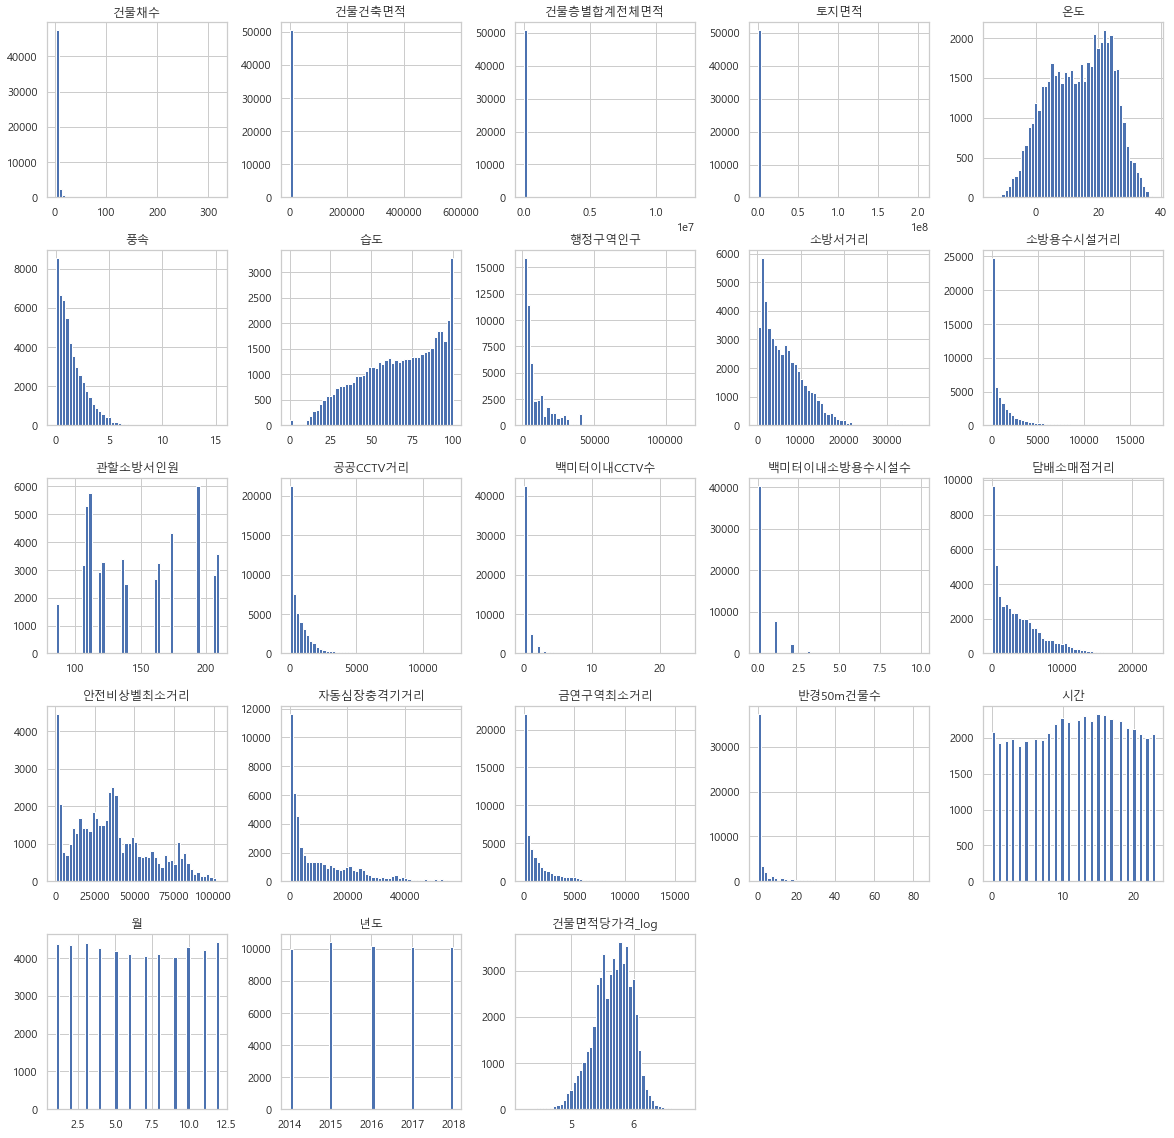

In [101]:
clean_train_df.hist(bins=50, figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='건물채수_log', ylabel='화재발생'>

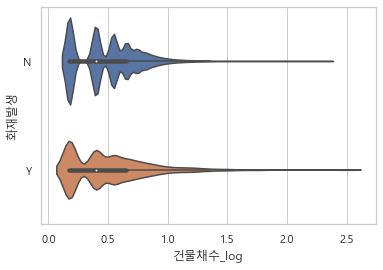

In [102]:
df["건물채수_log"] = np.log10(df["건물채수"]+0.5)
temp_df = pd.merge(df[["건물채수_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='건물채수_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='건물건축면적_log', ylabel='화재발생'>

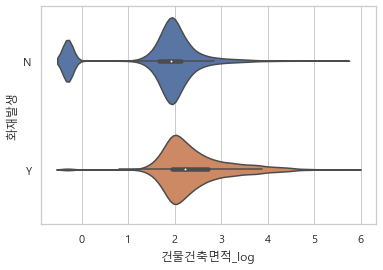

In [103]:
df["건물건축면적_log"] = np.log10(df["건물건축면적"]+0.5)
temp_df = pd.merge(df[["건물건축면적_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='건물건축면적_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='건물층별합계전체면적_log', ylabel='화재발생'>

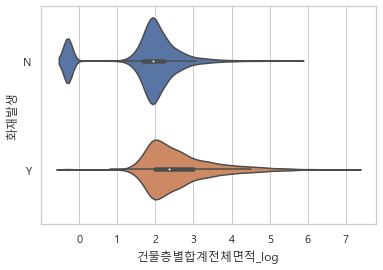

In [104]:
df["건물층별합계전체면적_log"] = np.log10(df["건물층별합계전체면적"]+0.5)
temp_df = pd.merge(df[["건물층별합계전체면적_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='건물층별합계전체면적_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='토지면적_log', ylabel='화재발생'>

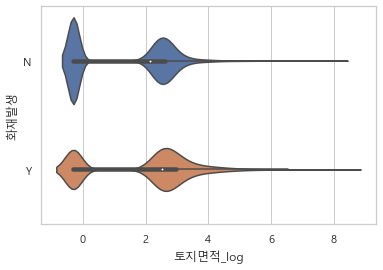

In [105]:
df["토지면적_log"] = np.log10(df["토지면적"]+0.5)
temp_df = pd.merge(df[["토지면적_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='토지면적_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='풍속_log', ylabel='화재발생'>

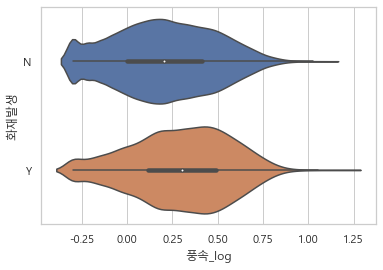

In [106]:
df["풍속_log"] = np.log10(df["풍속"]+0.5)
temp_df = pd.merge(df[["풍속_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='풍속_log', y="화재발생", data=temp_df)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='습도_log', ylabel='Density'>

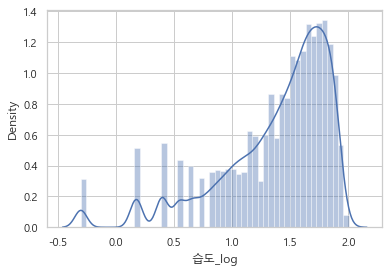

In [107]:
df["습도_log"] = np.log10(-df["습도"]+100.5)
sns.distplot(df["습도_log"], bins=50)

<AxesSubplot:xlabel='습도_log', ylabel='화재발생'>

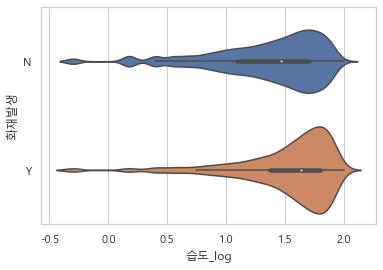

In [108]:
temp_df = pd.merge(df["습도_log"], y_train, left_index=True, right_index=True)
sns.violinplot(x='습도_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='행정구역인구_log', ylabel='화재발생'>

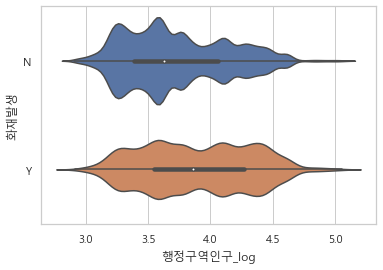

In [109]:
df["행정구역인구_log"] = np.log10(df["행정구역인구"]+0.5)
temp_df = pd.merge(df[["행정구역인구_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='행정구역인구_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='소방서거리_log', ylabel='화재발생'>

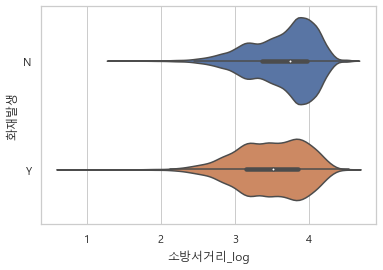

In [110]:
df["소방서거리_log"] = np.log10(df["소방서거리"]+0.5)
temp_df = pd.merge(df[["소방서거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='소방서거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='소방용수시설거리_log', ylabel='화재발생'>

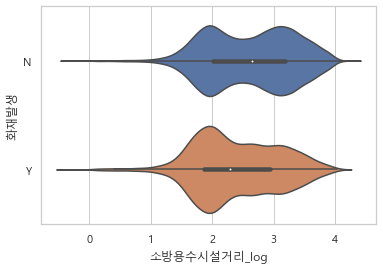

In [111]:
df["소방용수시설거리_log"] = np.log10(df["소방용수시설거리"]+0.5)
temp_df = pd.merge(df[["소방용수시설거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='소방용수시설거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='공공CCTV거리_log', ylabel='화재발생'>

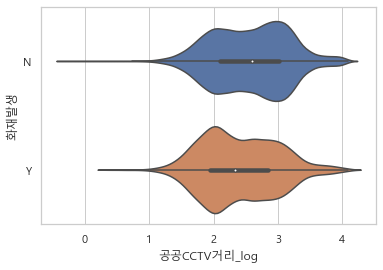

In [112]:
df["공공CCTV거리_log"] = np.log10(df["공공CCTV거리"]+0.5)
temp_df = pd.merge(df[["공공CCTV거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='공공CCTV거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='백미터이내CCTV수_log', ylabel='화재발생'>

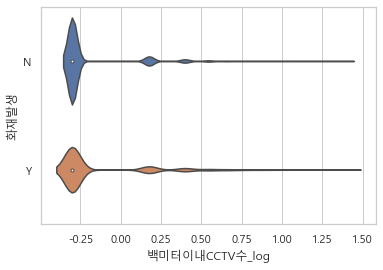

In [113]:
df["백미터이내CCTV수_log"] = np.log10(df["백미터이내CCTV수"]+0.5)
temp_df = pd.merge(df[["백미터이내CCTV수_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='백미터이내CCTV수_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='백미터이내소방용수시설수_log', ylabel='화재발생'>

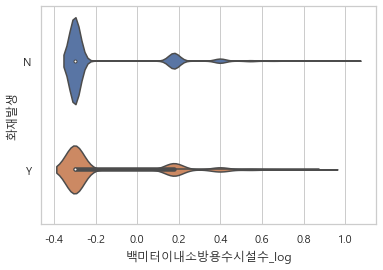

In [114]:
df["백미터이내소방용수시설수_log"] = np.log10(df["백미터이내소방용수시설수"]+0.5)
temp_df = pd.merge(df[["백미터이내소방용수시설수_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='백미터이내소방용수시설수_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='담배소매점거리_log', ylabel='화재발생'>

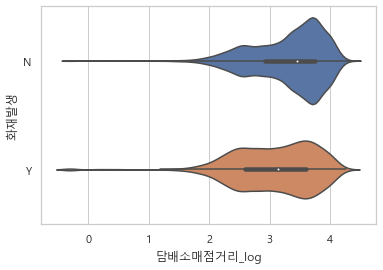

In [115]:
df["담배소매점거리_log"] = np.log10(df["담배소매점거리"]+0.5)
temp_df = pd.merge(df[["담배소매점거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='담배소매점거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='안전비상벨최소거리_log', ylabel='화재발생'>

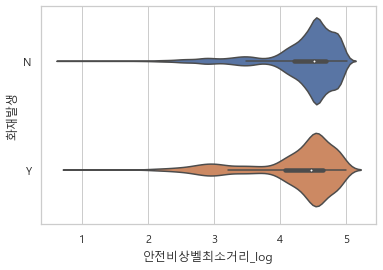

In [116]:
df["안전비상벨최소거리_log"] = np.log10(df["안전비상벨최소거리"]+0.5)
temp_df = pd.merge(df[["안전비상벨최소거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='안전비상벨최소거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='자동심장충격기거리_log', ylabel='화재발생'>

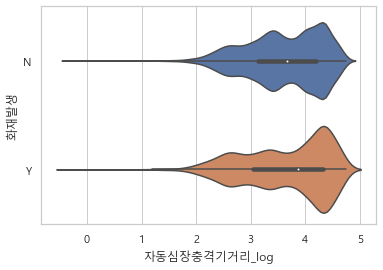

In [117]:
df["자동심장충격기거리_log"] = np.log10(df["자동심장충격기거리"]+0.5)
temp_df = pd.merge(df[["자동심장충격기거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='자동심장충격기거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='금연구역최소거리_log', ylabel='화재발생'>

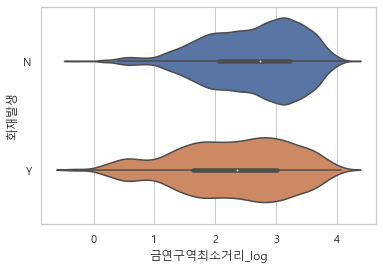

In [118]:
df["금연구역최소거리_log"] = np.log10(df["금연구역최소거리"]+0.5)
temp_df = pd.merge(df[["금연구역최소거리_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='금연구역최소거리_log', y="화재발생", data=temp_df)

<AxesSubplot:xlabel='반경50m건물수_log', ylabel='화재발생'>

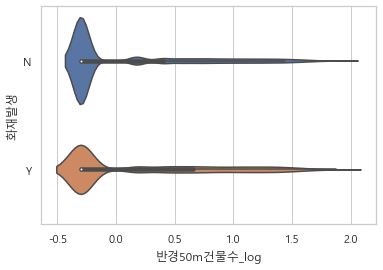

In [119]:
df["반경50m건물수_log"] = np.log10(df["반경50m건물수"]+0.5)
temp_df = pd.merge(df[["반경50m건물수_log"]], y_train, left_index=True, right_index=True)
sns.violinplot(x='반경50m건물수_log', y="화재발생", data=temp_df)

In [120]:
numeric_log = ['건물채수_log', '건물건축면적_log', '건물층별합계전체면적_log', '토지면적_log', '풍속_log', '습도_log', '행정구역인구_log', 
               '소방서거리_log', '소방용수시설거리_log', '공공CCTV거리_log', '백미터이내CCTV수_log', '백미터이내소방용수시설수_log', 
               '담배소매점거리_log', '안전비상벨최소거리_log', '자동심장충격기거리_log', '금연구역최소거리_log', '반경50m건물수_log']

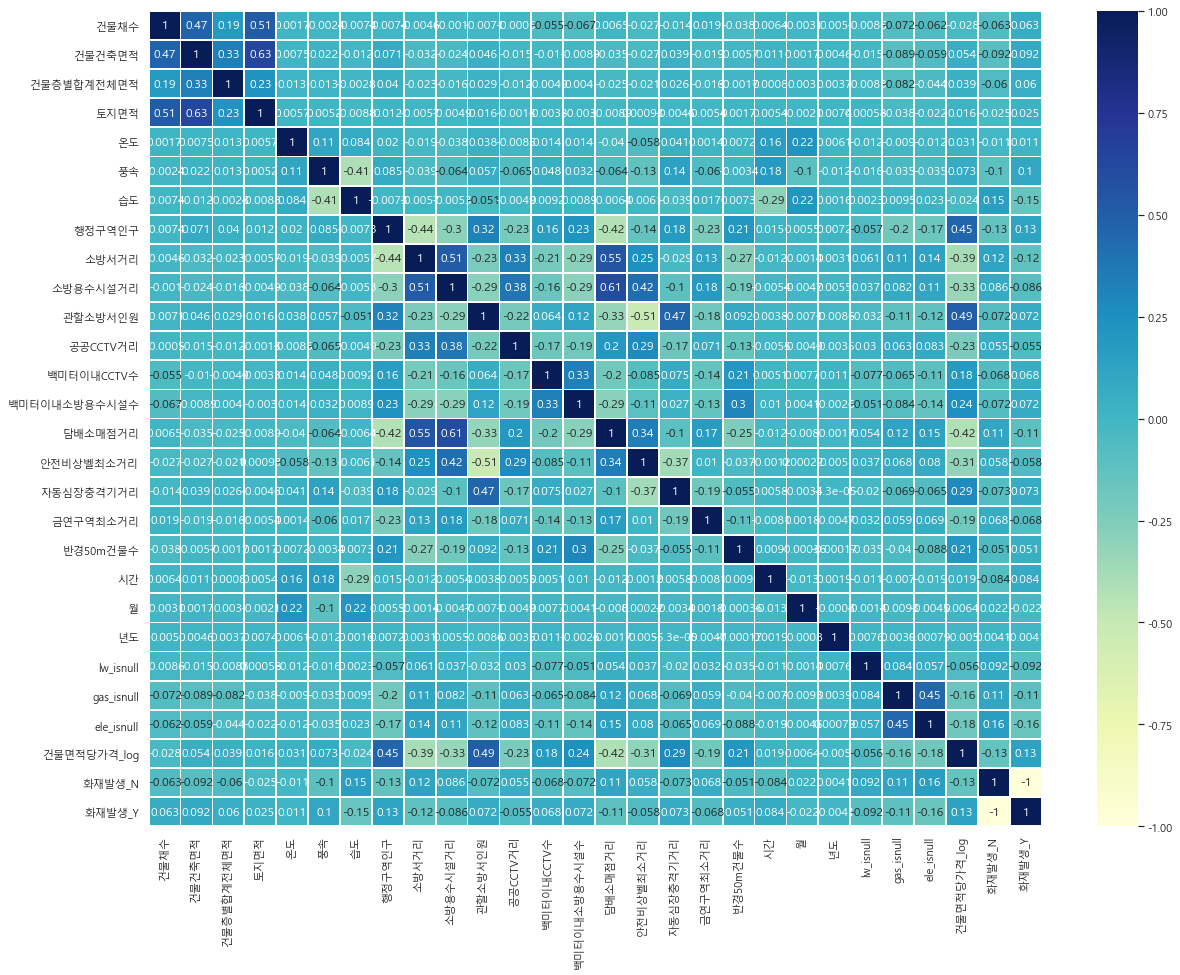

In [121]:
corr = pd.merge(clean_train_df[numeric_col], y_train_onehot, left_index=True, right_index=True).corr()

plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

화재발생_Y 와 상관관계가 높은 것들
- 습도 -0.14
- 소방용수시설거리 -0.17
- 자동심장충격기거리 0.11

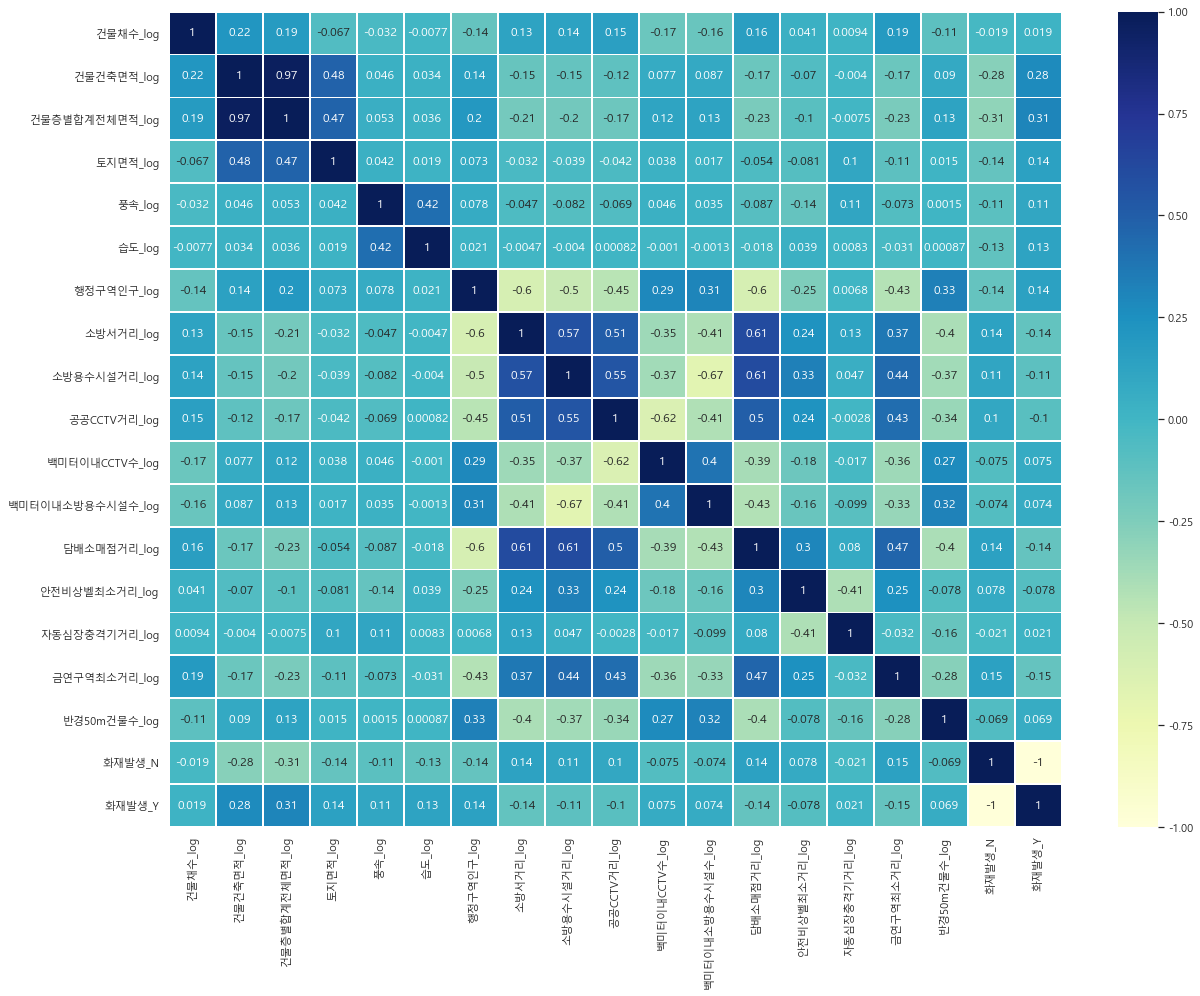

In [122]:
corr = pd.merge(df[numeric_log], y_train_onehot, left_index=True, right_index=True).corr()

plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

화재발생_Y 와 상관관계가 높은 것들
- 건물건축면적_log 0.28
- 건물층별합계전체면적_log 0.31
- 토지면적_log 0.14
- 풍속_log 0.11
- 습도_log 0.12
- 행정구역인구_log 0.13
- 소방서거리_log -0.13
- 담배소매점거리_log -0.14
- 금연구역최소거리_log -0.14

## Object Data

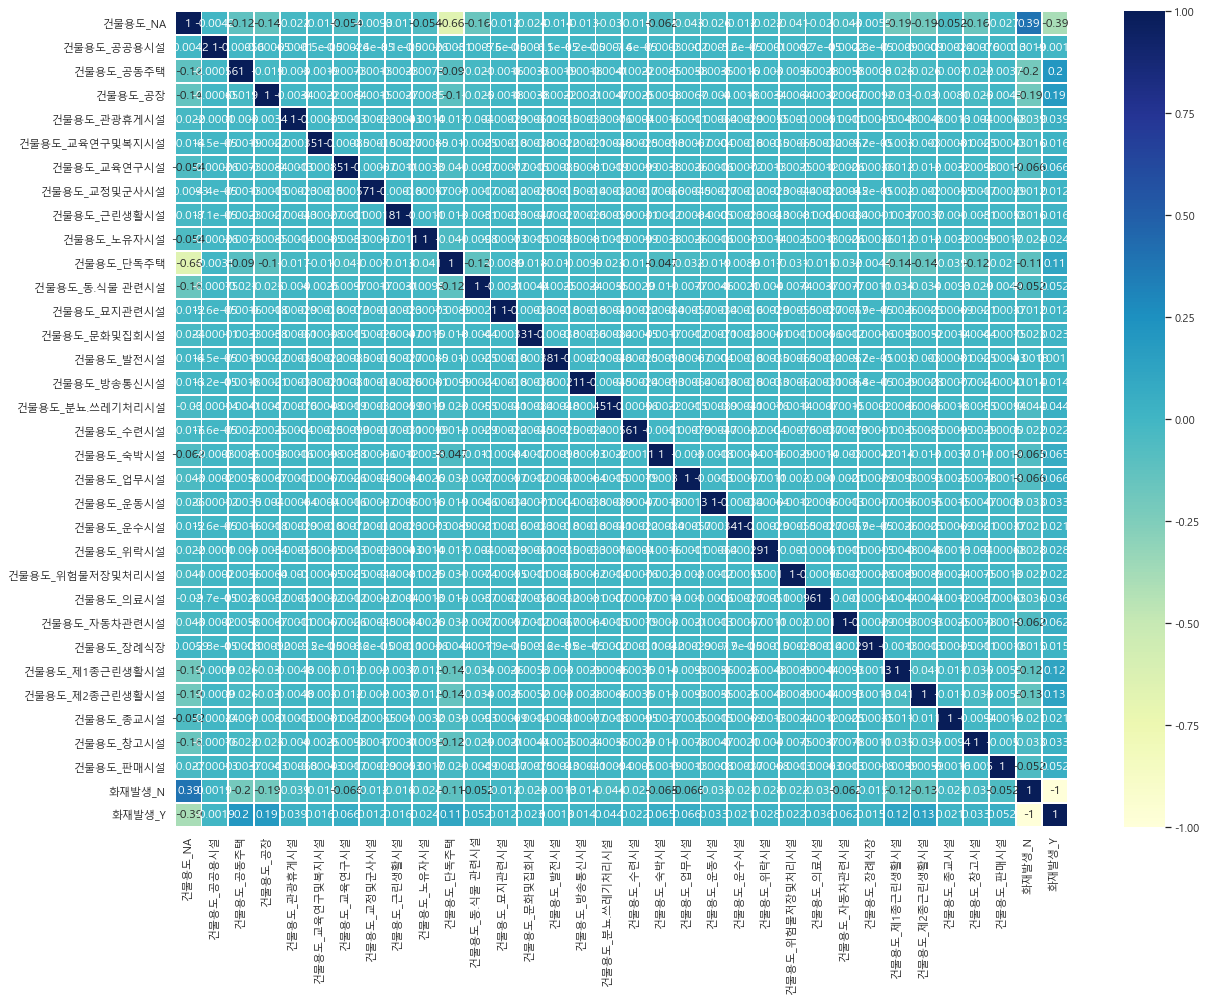

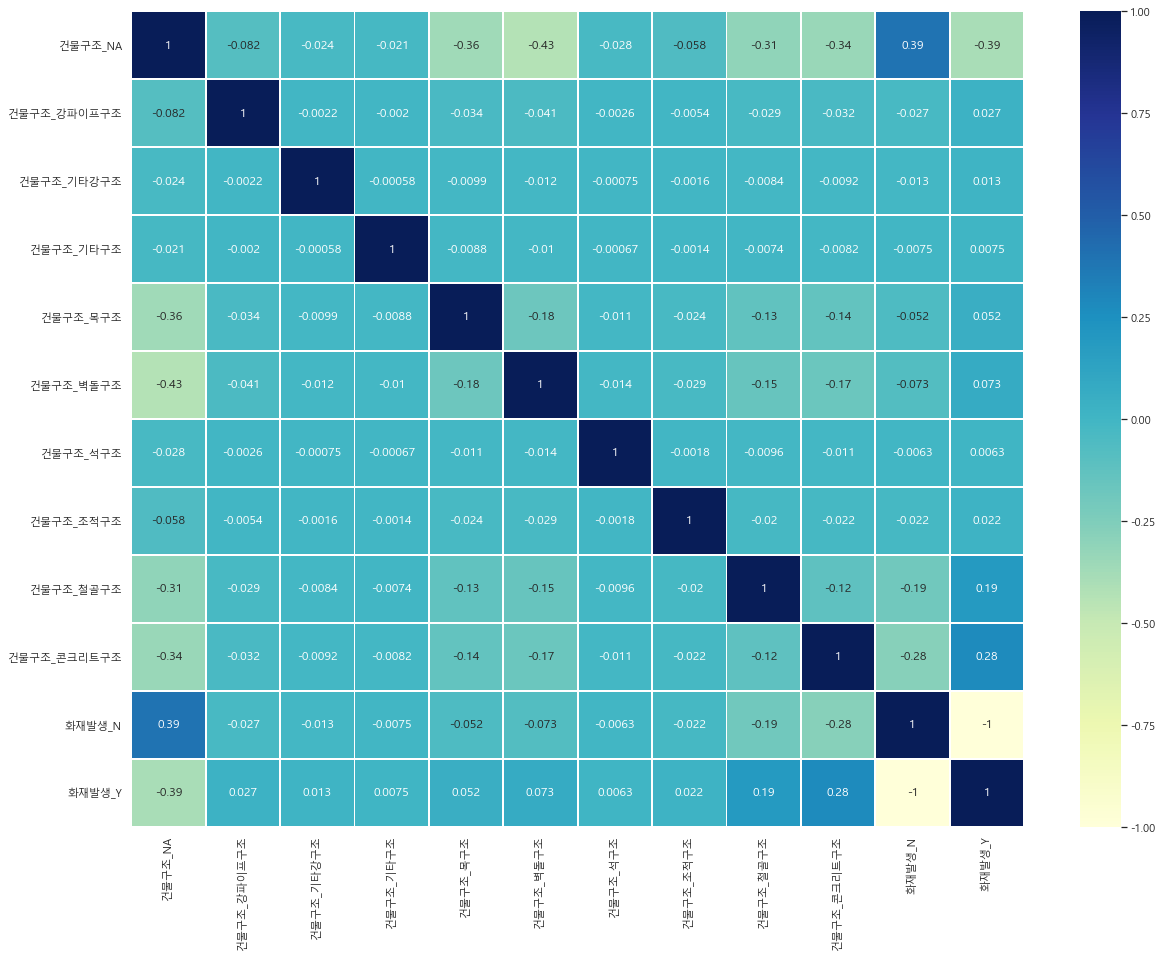

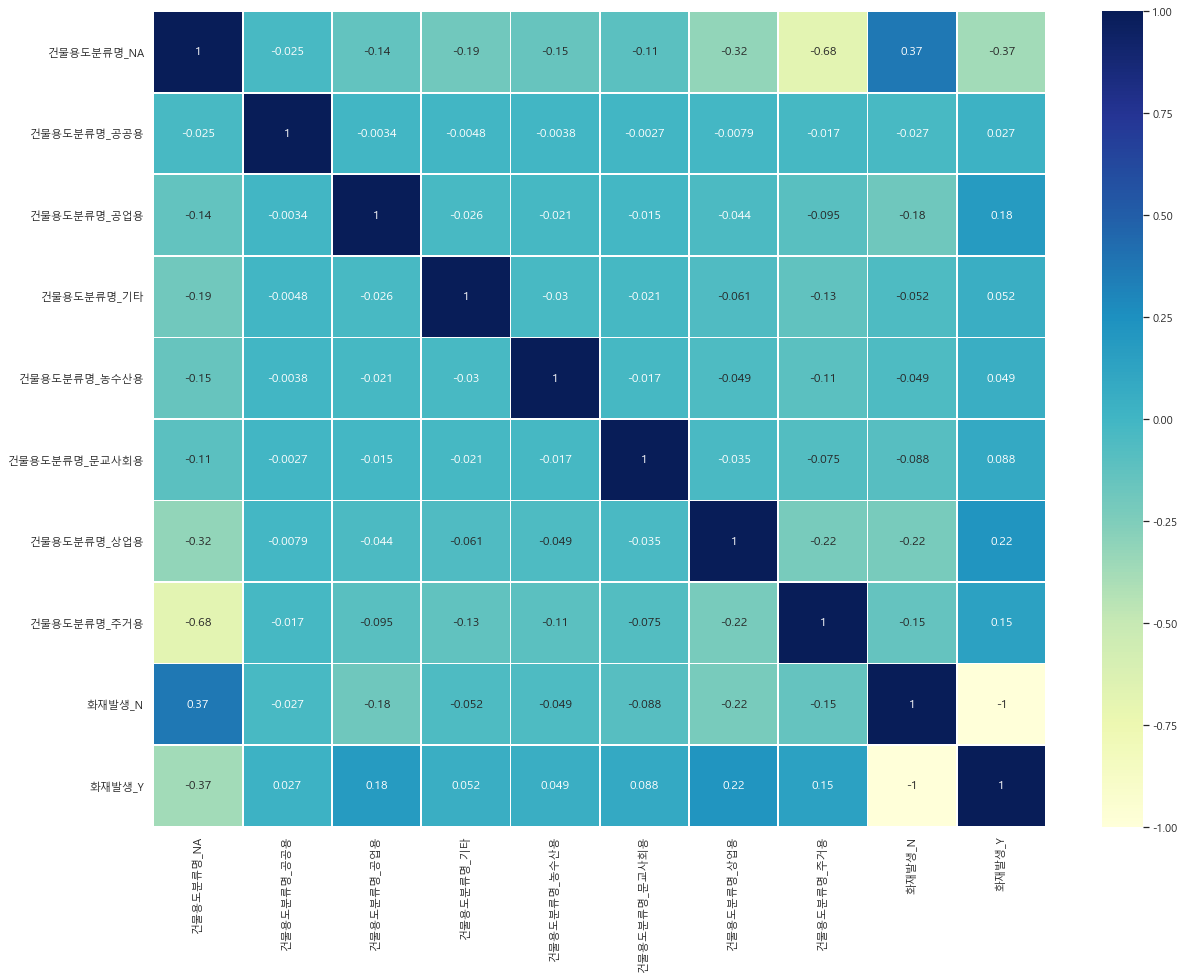

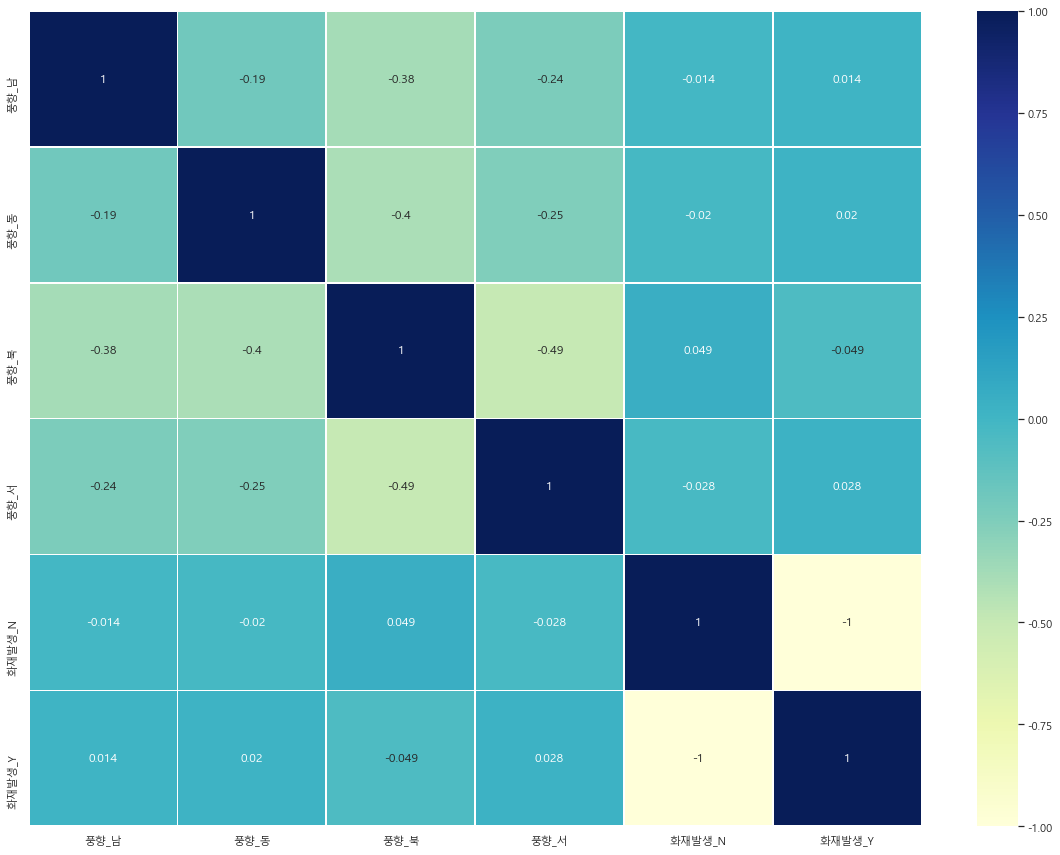

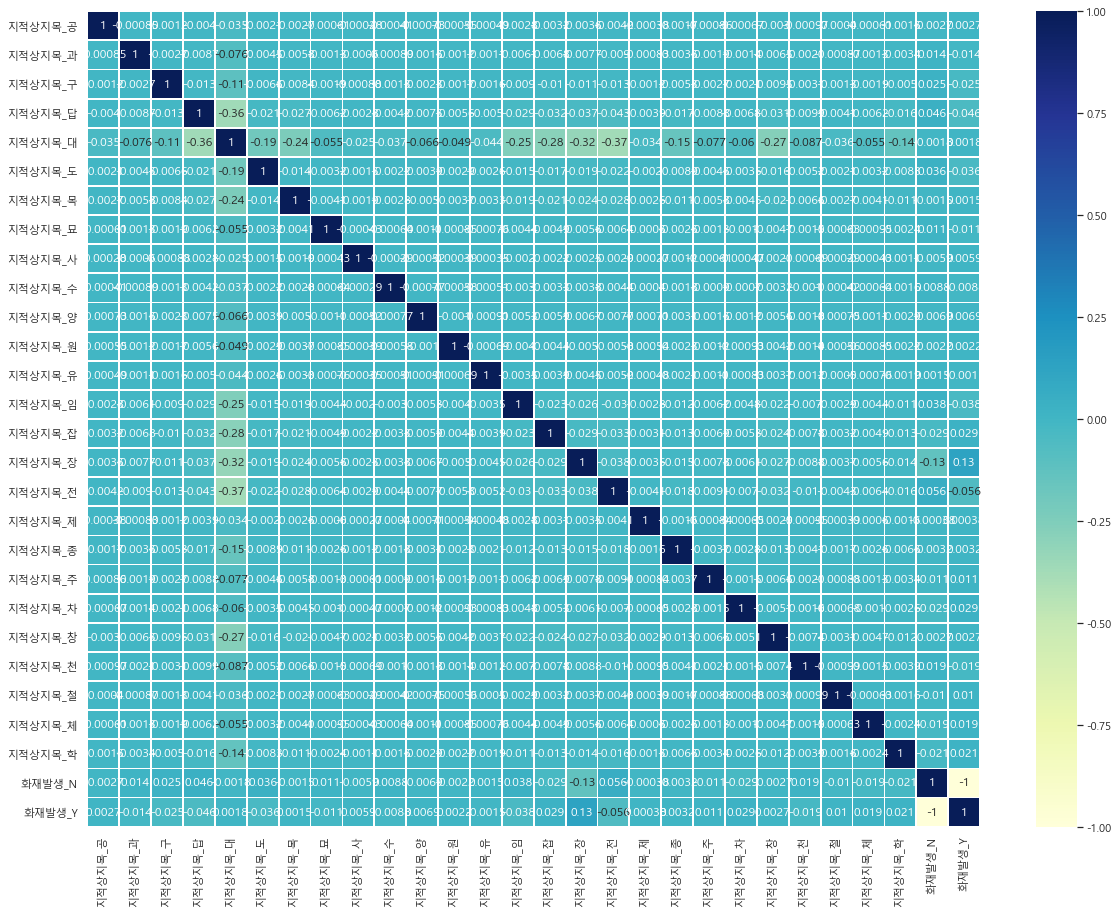

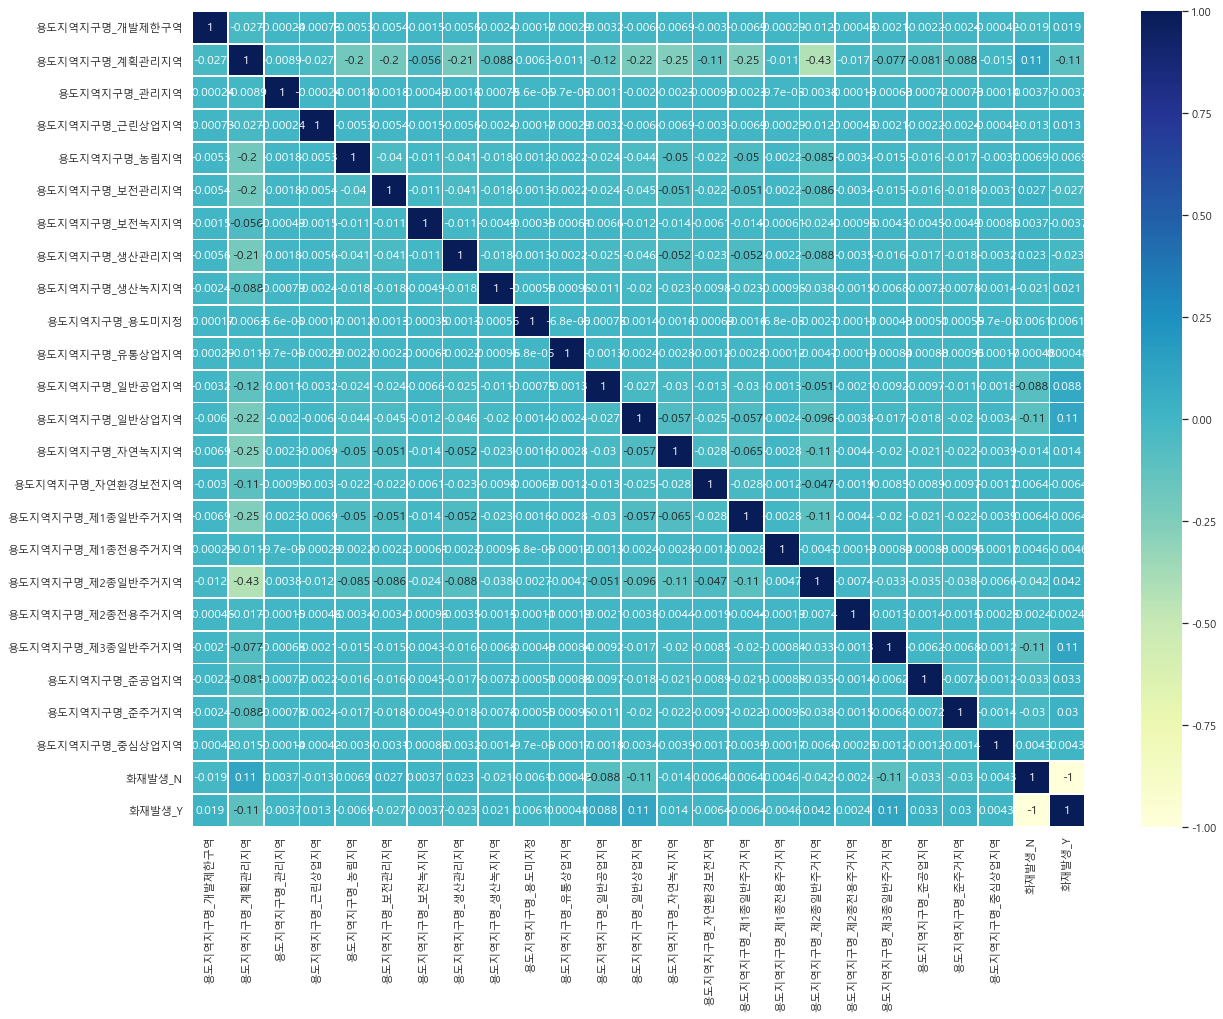

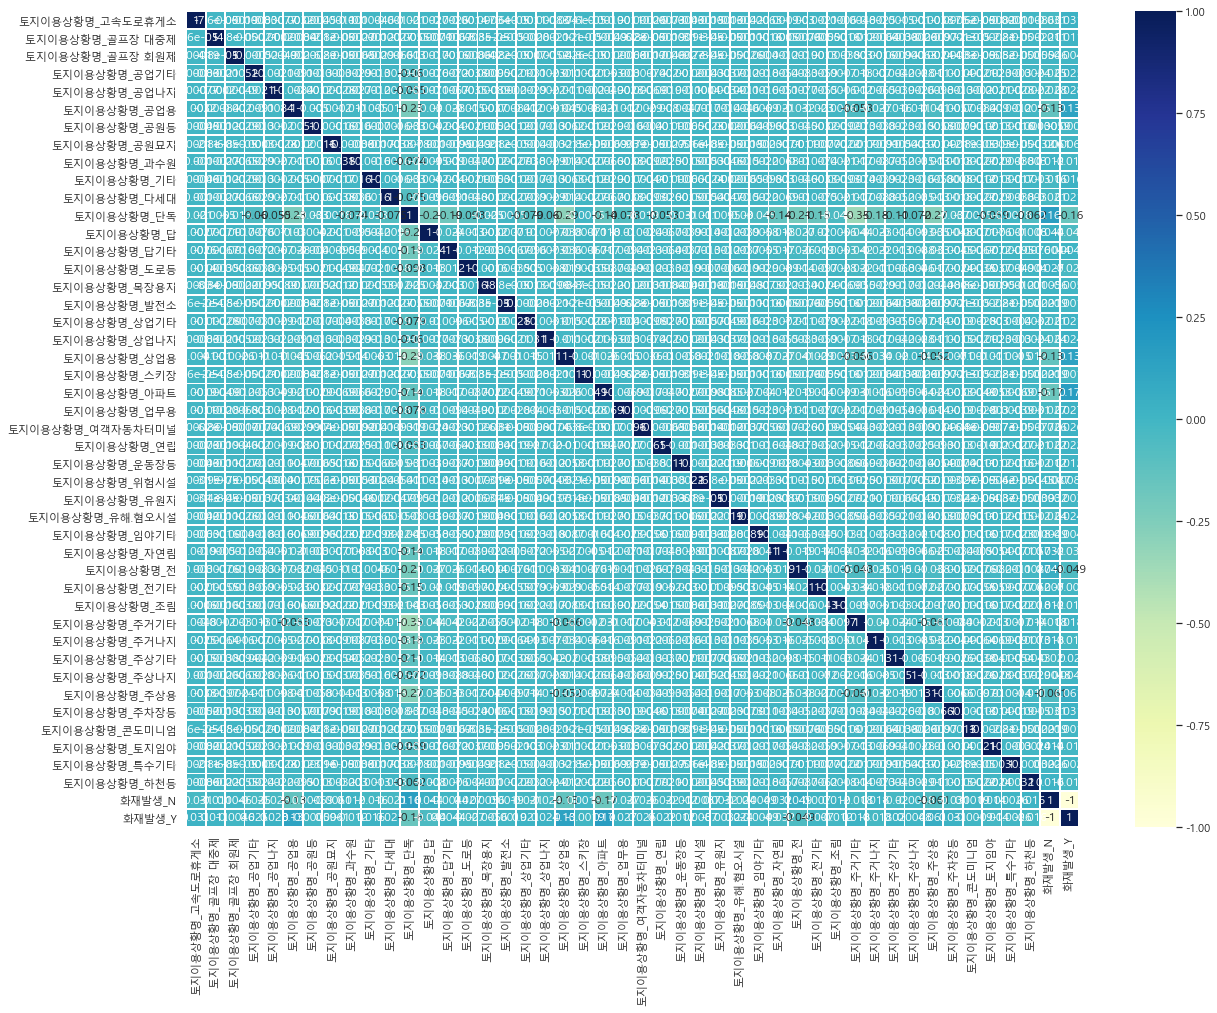

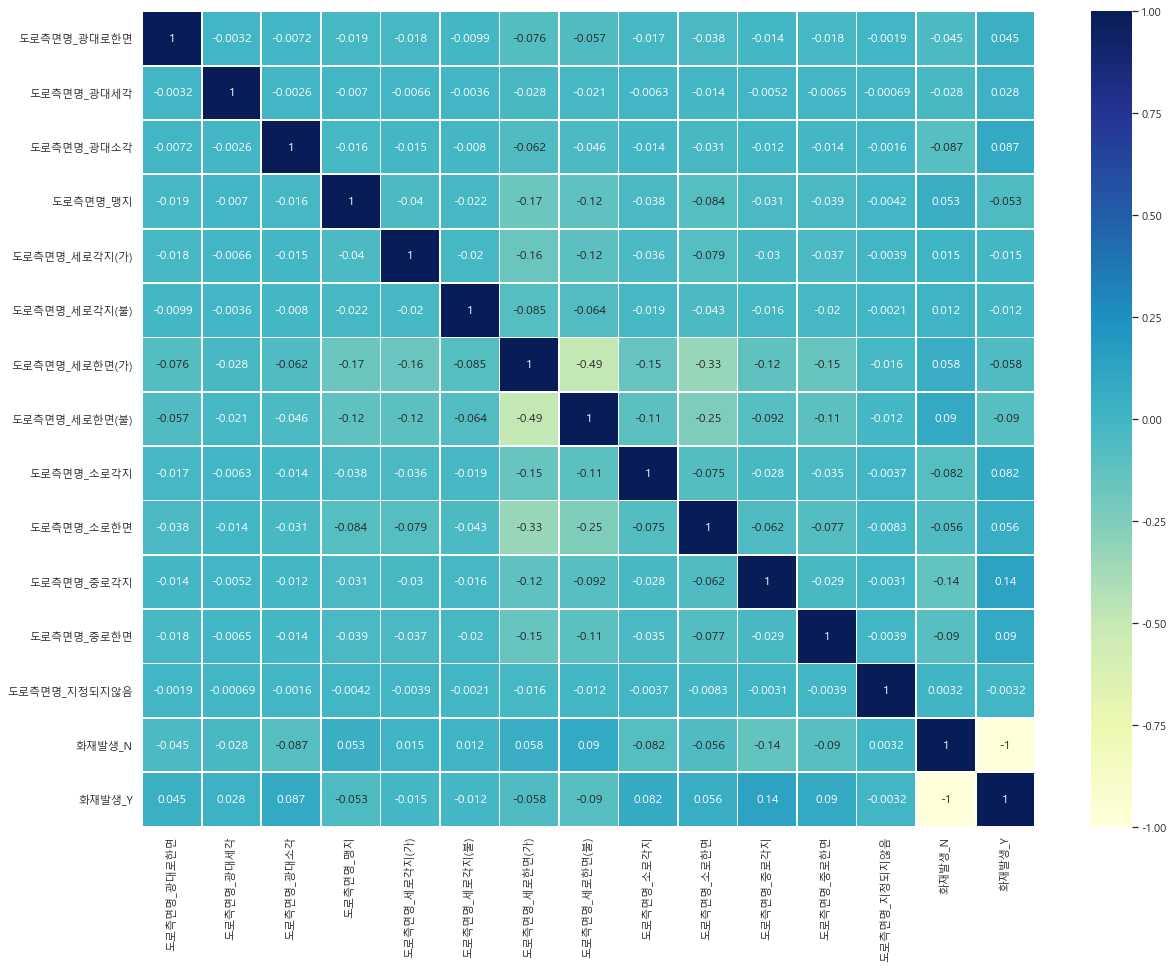

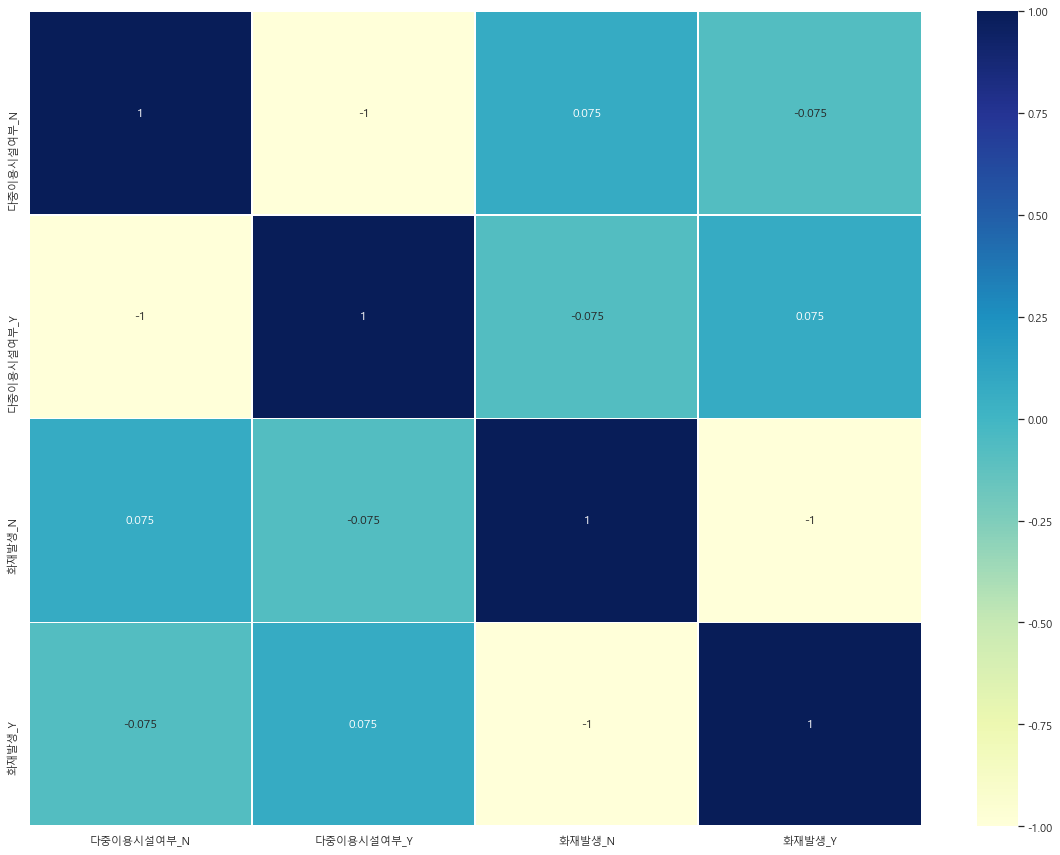

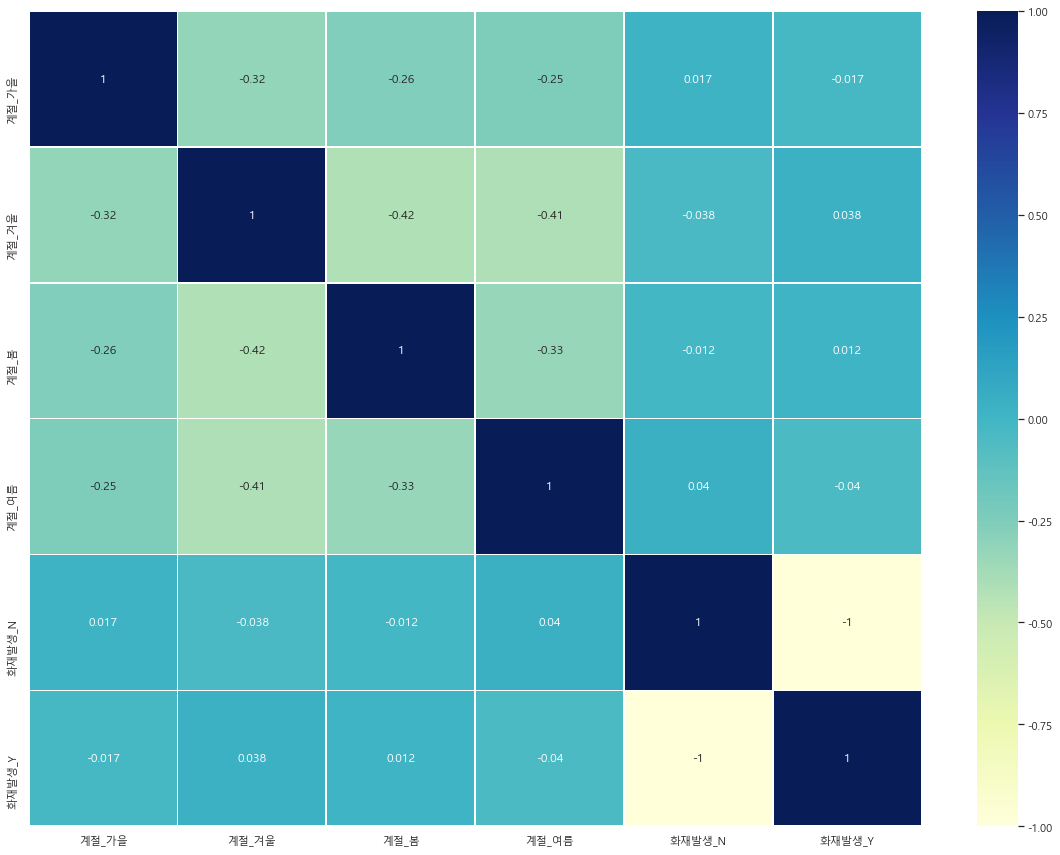

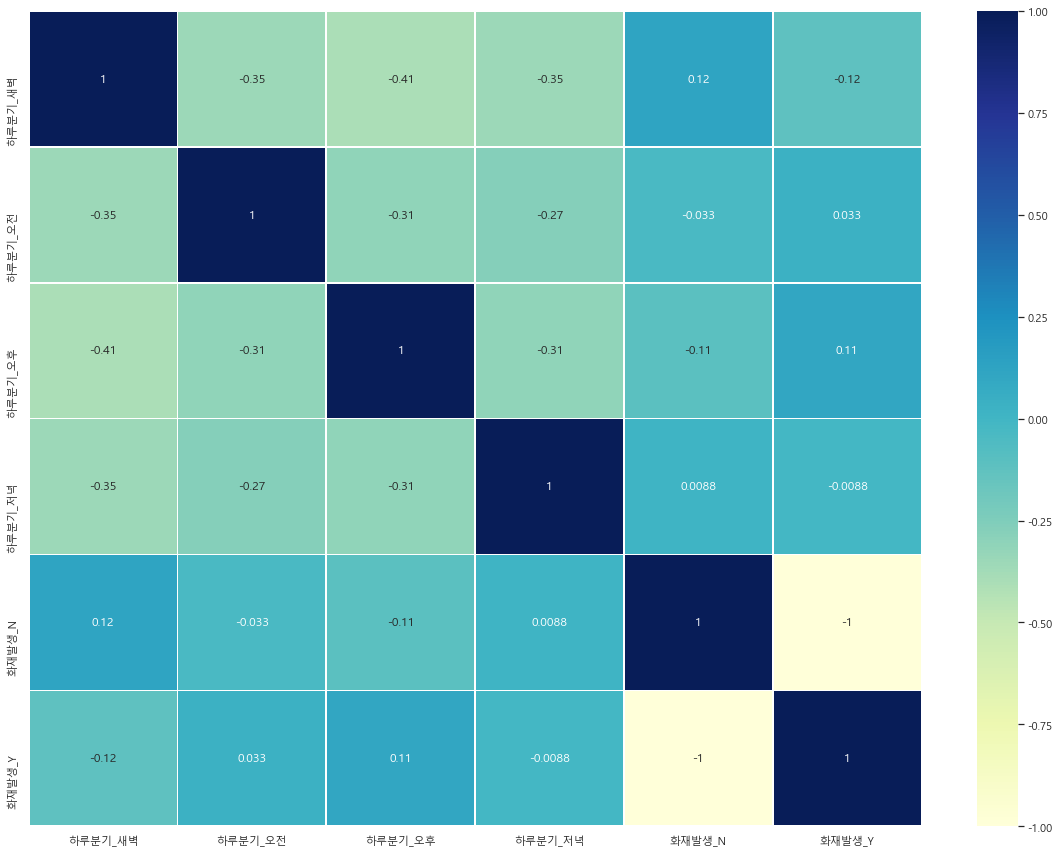

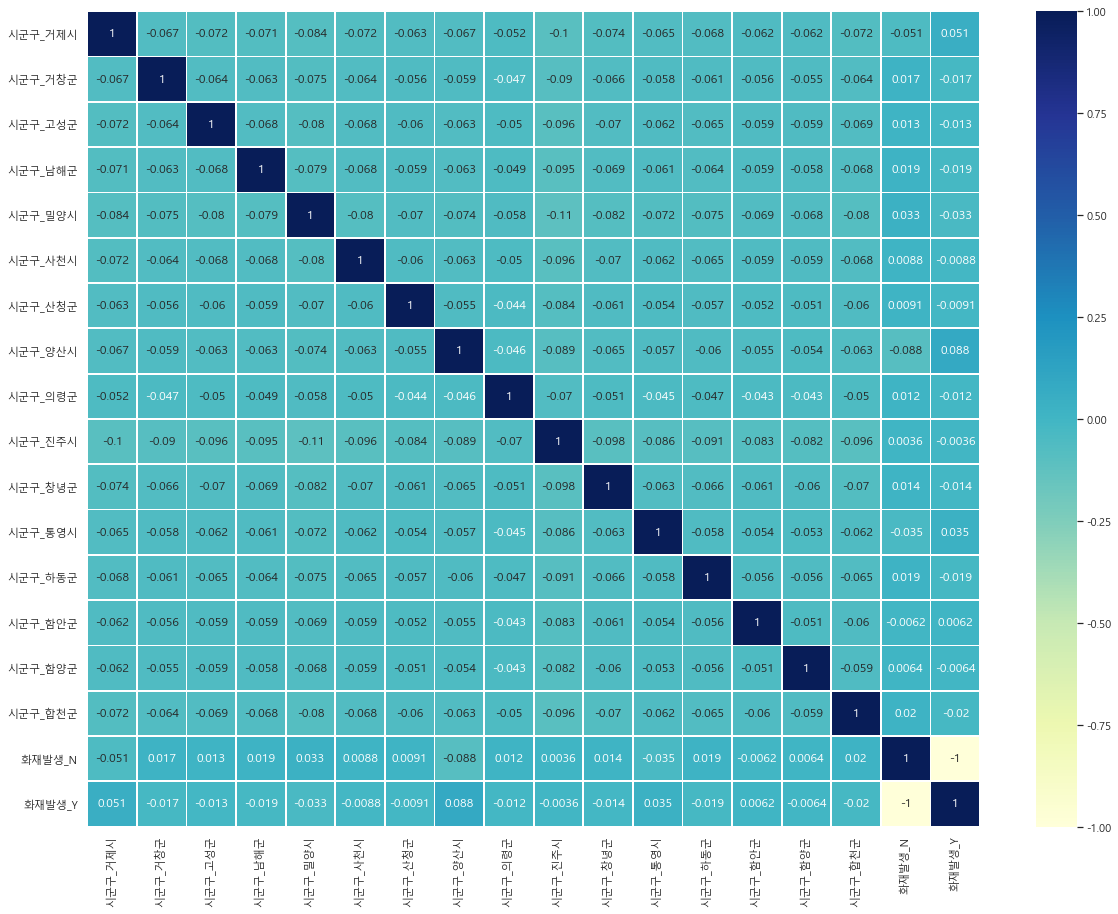

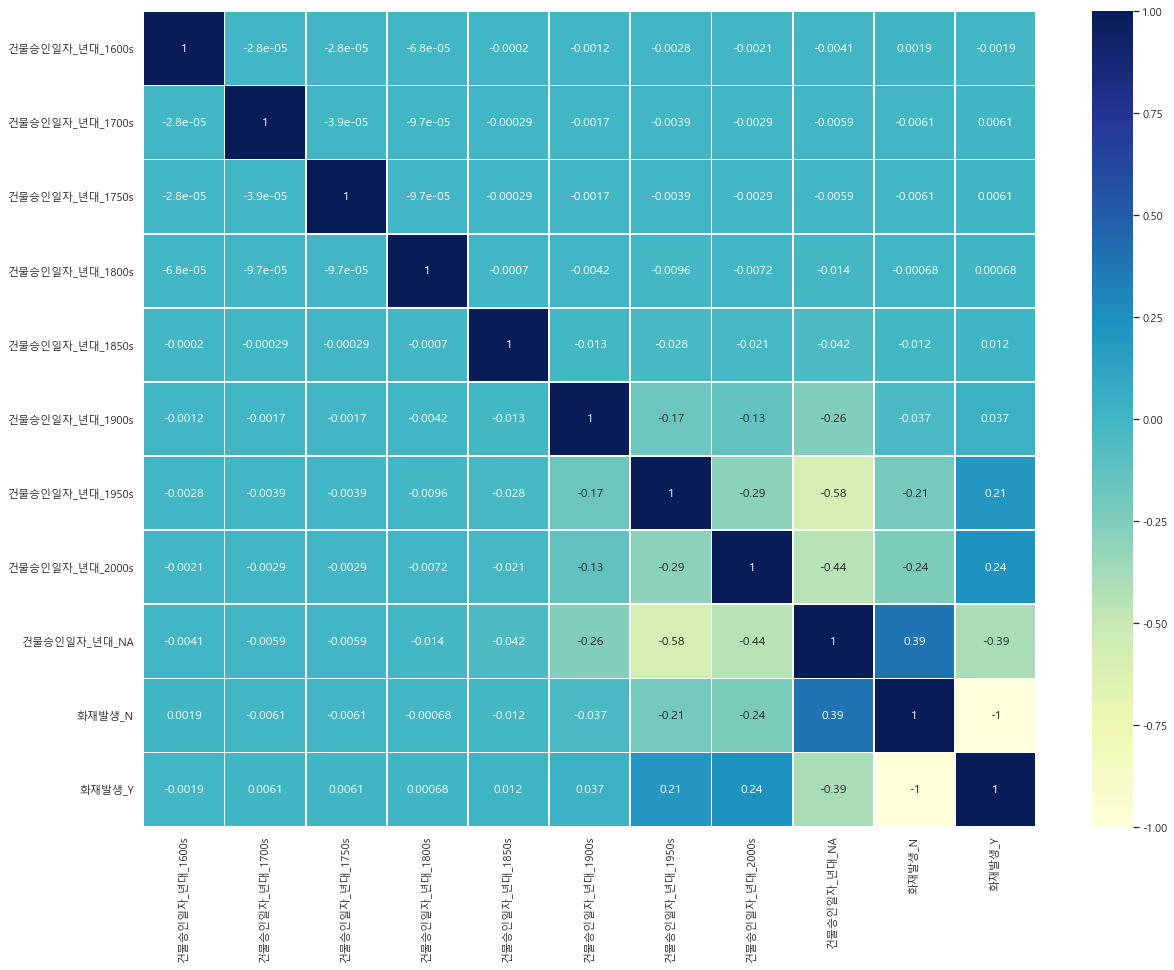

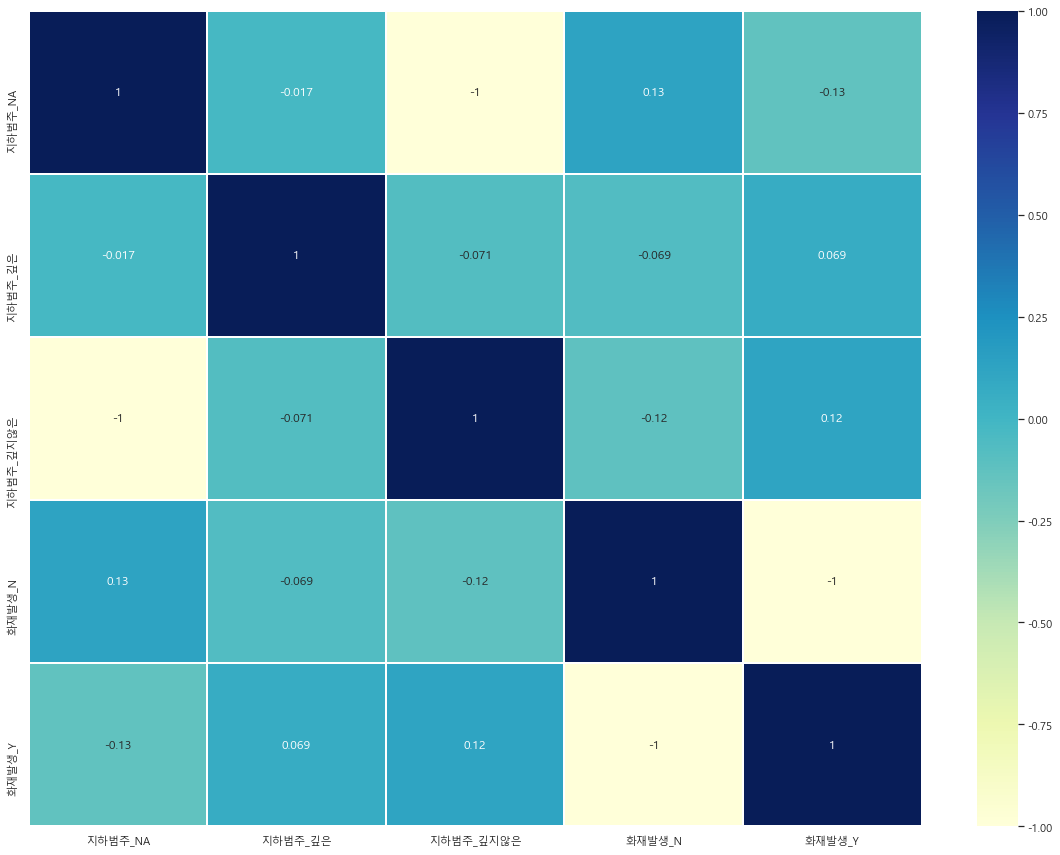

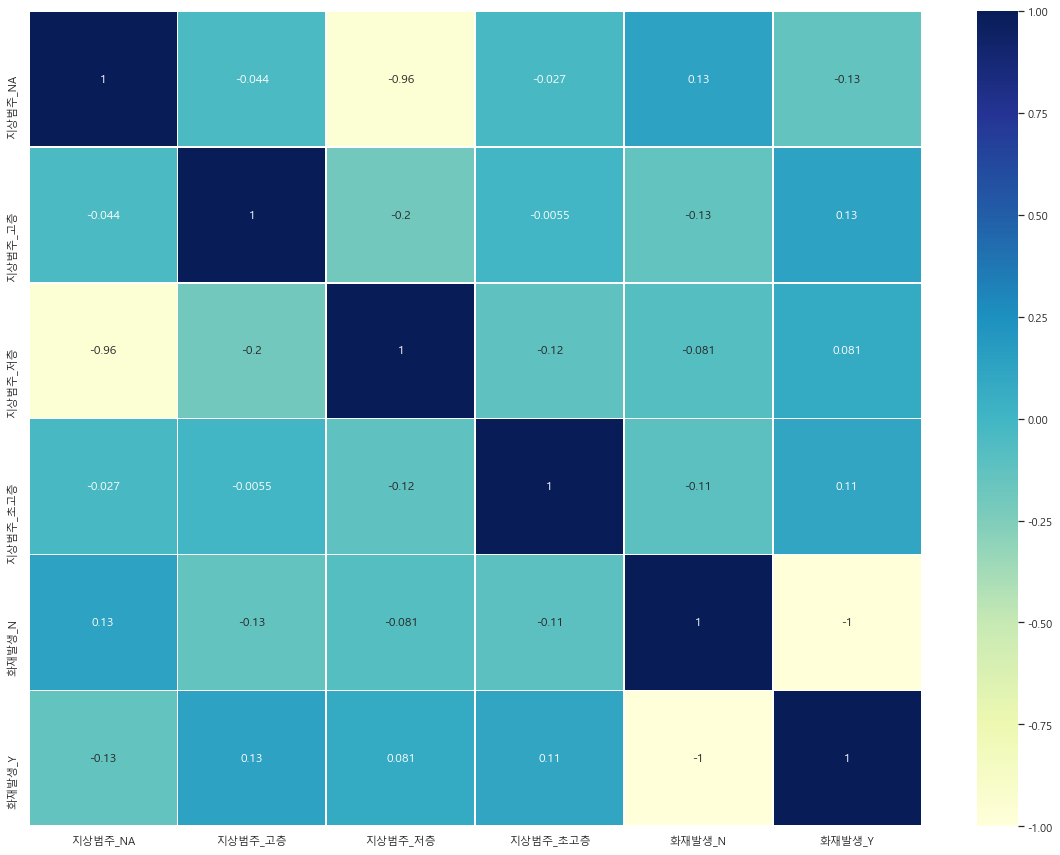

In [123]:
for col_name in object_col:
    temp_df = pd.get_dummies(clean_train_df[[col_name]])
    corr = pd.merge(temp_df, y_train_onehot, left_index=True, right_index=True).corr()

    plt.subplots(figsize=(20,15))
    ax = sns.heatmap(corr, annot=True,linewidths=.8, cmap="YlGnBu")

화재발생_Y 와 상관관계가 높은 것들
- 건물용도_NA   -0.36
- 건물용도_공동주택  0.19
- 건물용도_공장 0.18
- 건물용도_제1종근린생활시설 0.11
- 건물용도_제2종근린생활시설 0.13
- 건물구조_NA -0.36
- 건물구조_철골구조 0.19
- 건물구조_콘크리트구조 0.26
- 건물용도분류명_NA -0.34
- 건물용도분류명_공업용 0.17
- 상업용 0.21
- 주거용 0.12
- 지적상지목_장 0.11
- 도로측면명_중로각지 0.12
- 건물승인일자_년대_1950s 0.17
- 건물승인일자_년대_2000s 0.23
- 건물승인일자_년대_NA -0.36
- 지하범주_NA 0.11
- 지하범주_깊지않은 -0.11
- 지상범주_NA -0.12
- 고층 0.12


다양한 범주에서 NA 값이 상당히 높은 상관관계가 나와서 확인한다.


### 건물용도

In [124]:
temp_df = pd.merge(df[df["건물용도"]=="NA"][["건물용도"]], y_train, left_index=True, right_index=True)
temp_df

건물용도 화재발생
0       NA    N
4       NA    N
12      NA    N
14      NA    N
17      NA    N
...    ...  ...
50747   NA    N
50749   NA    N
50750   NA    N
50751   NA    N
50752   NA    N

[23707 rows x 2 columns]

In [125]:
len(temp_df[temp_df.화재발생 == "N"])/len(temp_df)

0.9987345509765049

- 대부분이 화재발생 "N" 데이터이다
### 건물구조

In [126]:
temp_df = pd.merge(df[df["건물구조"]=="NA"][["건물구조"]], y_train, left_index=True, right_index=True)
temp_df

건물구조 화재발생
0       NA    N
4       NA    N
12      NA    N
14      NA    N
17      NA    N
...    ...  ...
50747   NA    N
50749   NA    N
50750   NA    N
50751   NA    N
50752   NA    N

[23692 rows x 2 columns]

In [127]:
len(temp_df[temp_df.화재발생 == "N"])/len(temp_df)

0.9991136248522708

- 대부분이 화재발생 "N" 데이터이다
### 건물승인일자_년대

In [128]:
temp_df = pd.merge(df[df["건물승인일자_년대"]=="NA"][["건물승인일자_년대"]], y_train, left_index=True, right_index=True)
temp_df

건물승인일자_년대 화재발생
0            NA    N
4            NA    N
12           NA    N
14           NA    N
17           NA    N
...         ...  ...
50747        NA    N
50749        NA    N
50750        NA    N
50751        NA    N
50752        NA    N

[23624 rows x 2 columns]

In [129]:
len(temp_df[temp_df.화재발생 == "N"])/len(temp_df)

0.9999153403318659

- 대부분이 화재발생 "N" 데이터이다
### 지하범주

In [130]:
temp_df = pd.merge(df[df["지하범주"]=="NA"][["지하범주"]], y_train, left_index=True, right_index=True)
temp_df

지하범주 화재발생
4       NA    N
13      NA    N
18      NA    Y
47      NA    N
57      NA    N
...    ...  ...
50722   NA    N
50730   NA    N
50734   NA    N
50747   NA    N
50751   NA    N

[9758 rows x 2 columns]

In [131]:
len(temp_df[temp_df.화재발생 == "N"])/len(temp_df)

0.9445583111293298

- 대부분이 화재발생 "N" 데이터이다
### 지상범주

In [132]:
temp_df = pd.merge(df[df["지상범주"]=="NA"][["지상범주"]], y_train, left_index=True, right_index=True)
temp_df

지상범주 화재발생
4       NA    N
13      NA    N
18      NA    Y
47      NA    N
57      NA    N
...    ...  ...
50722   NA    N
50730   NA    N
50734   NA    N
50747   NA    N
50751   NA    N

[8994 rows x 2 columns]

In [133]:
len(temp_df[temp_df.화재발생 == "N"])/len(temp_df)

0.9516344229486324

- 데이터 생성하면서 화재발생이 일어나지않은 데이터에만 NA 값이 많이 생성된것을 알 수 있다.
- NA 가 있는 것을 하나의 특성으로 사용하도록 한다.

In [134]:
df["건물용도_NA"] = pd.get_dummies(df[["건물용도"]])["건물용도_NA"]
df["건물용도_공동주택"] = pd.get_dummies(df[["건물용도"]])["건물용도_공동주택"]
df["건물용도_공장"] = pd.get_dummies(df[["건물용도"]])["건물용도_공장"]
df["건물용도_제1종근린생활시설"] = pd.get_dummies(df[["건물용도"]])["건물용도_제1종근린생활시설"]
df["건물용도_제2종근린생활시설"] = pd.get_dummies(df[["건물용도"]])["건물용도_제2종근린생활시설"]

df["건물구조_NA"] = pd.get_dummies(df[["건물구조"]])["건물구조_NA"]
df["건물구조_철근구조"] = pd.get_dummies(df[["건물구조"]])["건물구조_철골구조"]
df["건물구조_콘크리트구조"] = pd.get_dummies(df[["건물구조"]])["건물구조_콘크리트구조"]

df["건물용도분류명_NA"] = pd.get_dummies(df[["건물용도분류명"]])["건물용도분류명_NA"]
df["건물용도분류명_공업용"] = pd.get_dummies(df[["건물용도분류명"]])["건물용도분류명_공업용"]
df["건물용도분류명_상업용"] = pd.get_dummies(df[["건물용도분류명"]])["건물용도분류명_상업용"]
df["건물용도분류명_주거용"] = pd.get_dummies(df[["건물용도분류명"]])["건물용도분류명_주거용"]

df["지적상지목_장"] = pd.get_dummies(df[["지적상지목"]])["지적상지목_장"]

df["도로측면명_중로각지"] = pd.get_dummies(df[["도로측면명"]])["도로측면명_중로각지"]

df["건물승인일자_년대_1950s"] = pd.get_dummies(df[["건물승인일자_년대"]])["건물승인일자_년대_1950s"]
df["건물승인일자_년대_2000s"] = pd.get_dummies(df[["건물승인일자_년대"]])["건물승인일자_년대_2000s"]
df["건물승인일자_년대_NA"] = pd.get_dummies(df[["건물승인일자_년대"]])["건물승인일자_년대_NA"]

df["지하범주_NA"] = pd.get_dummies(df[["지하범주"]])["지하범주_NA"]
df["지하범주_깊지않은"] = pd.get_dummies(df[["지하범주"]])["지하범주_깊지않은"]

df["지상범주_NA"] = pd.get_dummies(df[["지상범주"]])["지상범주_NA"]
df["지상범주_고층"] = pd.get_dummies(df[["지상범주"]])["지상범주_고층"]

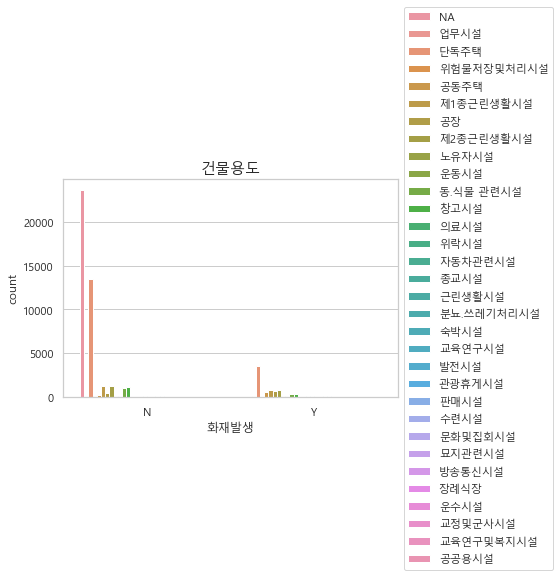

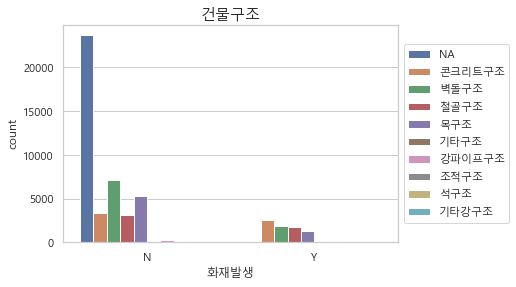

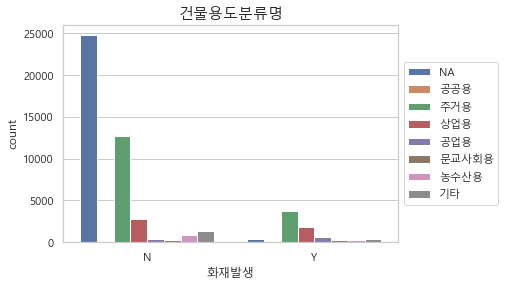

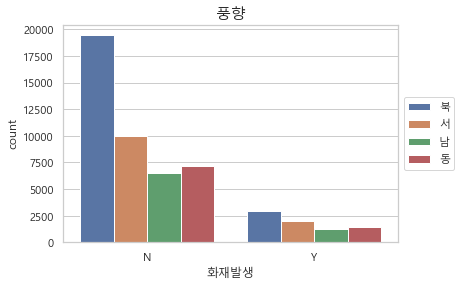

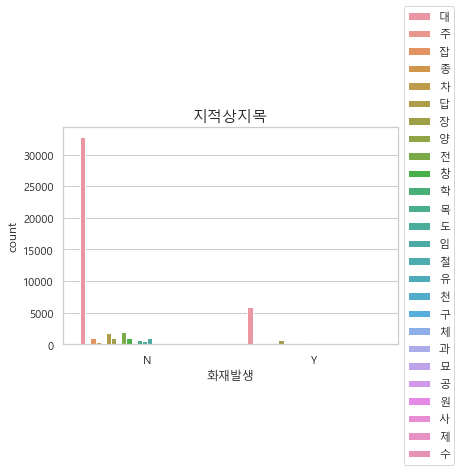

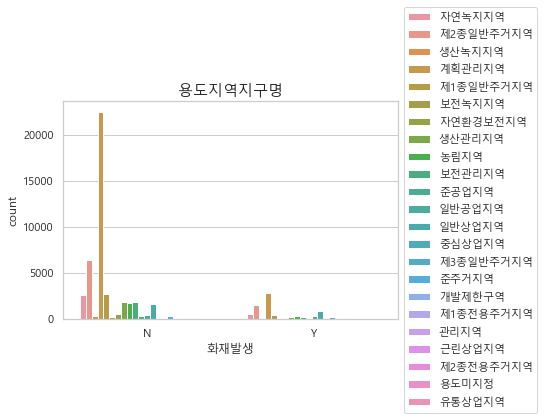

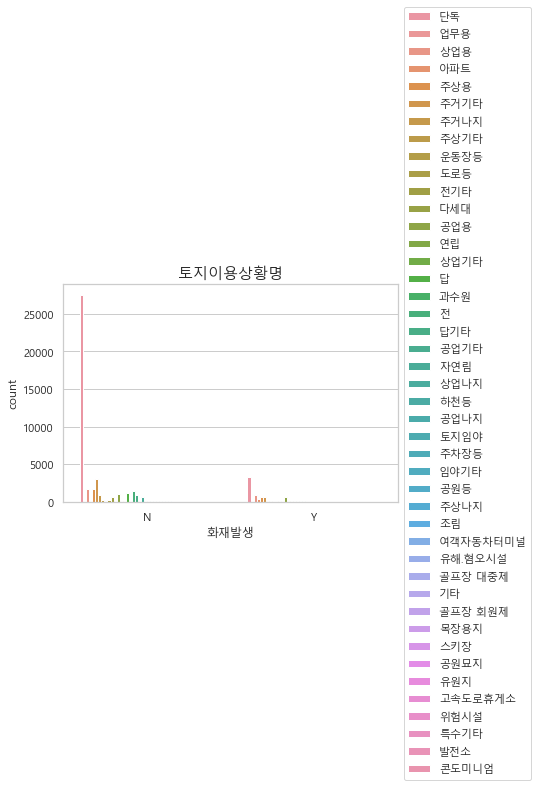

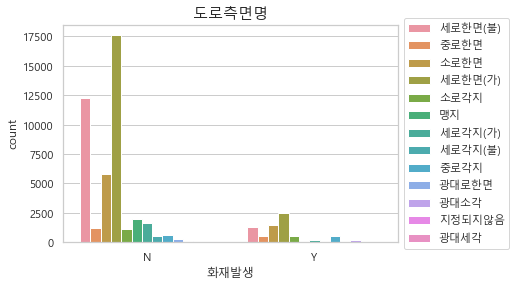

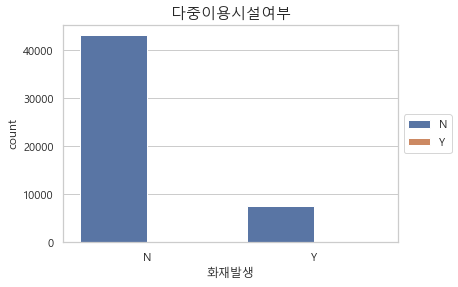

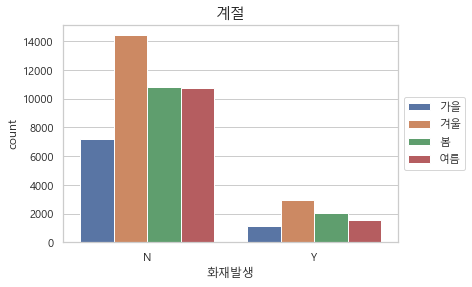

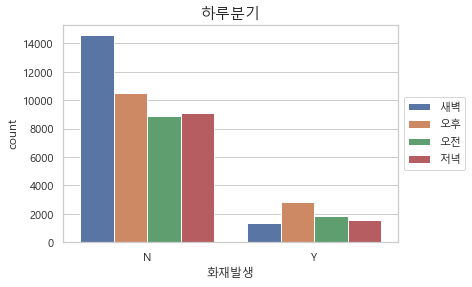

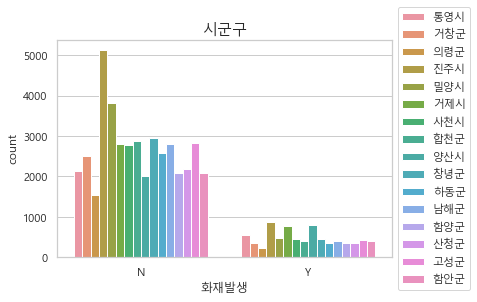

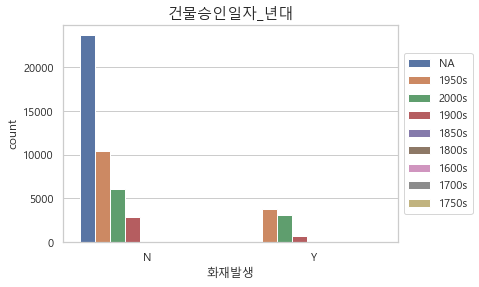

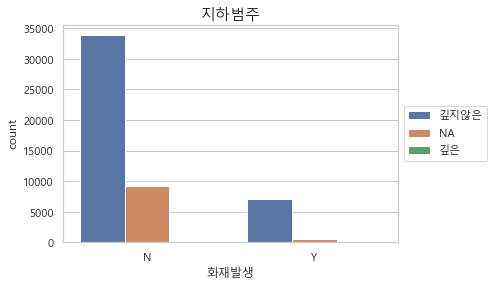

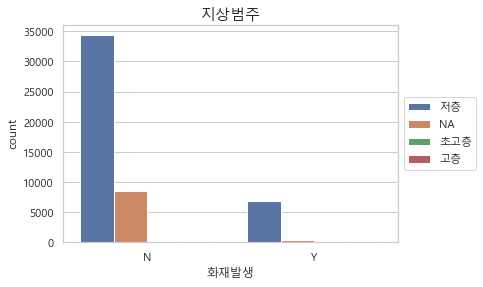

In [135]:
for col_name in object_col:
    temp_df = pd.merge(clean_train_df[col_name], y_train, left_index=True, right_index=True)
    sns.countplot(x="화재발생", hue=col_name, data=temp_df)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

## 새로운 데이터 생성 해보기
### 공동주택 이면서 콘크리트 구조이면 화재발생 가능성이 크다?

In [136]:
df["공동주택_콘크리트구조"] = (df["건물용도"] == "공동주택") & (df["건물구조"] == "콘크리트구조")

temp_df = pd.merge(y_train_onehot, pd.get_dummies(df[["공동주택_콘크리트구조"]]), left_index=True, right_index=True)
temp_df.corr()

화재발생_N    화재발생_Y  공동주택_콘크리트구조
화재발생_N       1.000000 -1.000000    -0.203442
화재발생_Y      -1.000000  1.000000     0.203442
공동주택_콘크리트구조 -0.203442  0.203442     1.000000

### 공장 이면서 콘크리트 구조이면 화재발생 가능성이 크다?

In [137]:
df["공장_콘크리트구조"] = (df["건물용도"] == "공장") & (df["건물구조"] == "콘크리트구조")

temp_df = pd.merge(y_train_onehot, pd.get_dummies(df[["공장_콘크리트구조"]]), left_index=True, right_index=True)
temp_df.corr()

화재발생_N    화재발생_Y  공장_콘크리트구조
화재발생_N     1.000000 -1.000000  -0.080376
화재발생_Y    -1.000000  1.000000   0.080376
공장_콘크리트구조 -0.080376  0.080376   1.000000

### 겨울 오후에 화재발생 가능성이 크다?

In [138]:
df["겨울_오후"] = (df["계절"] == "겨울") & (df["하루분기"] == "오후")
temp_df = pd.merge(y_train_onehot, pd.get_dummies(df[["겨울_오후"]]), left_index=True, right_index=True)
temp_df.corr()

화재발생_N    화재발생_Y     겨울_오후
화재발생_N  1.000000 -1.000000 -0.071959
화재발생_Y -1.000000  1.000000  0.071959
겨울_오후  -0.071959  0.071959  1.000000

### 건물층별합계전체면적*소방서거리

In [141]:
df["면적*소방서거리"] = df["건물층별합계전체면적"] * df["소방서거리"]
temp_df = pd.merge(y_train_onehot, pd.get_dummies(df[["면적*소방서거리"]]), left_index=True, right_index=True)
temp_df.corr()

화재발생_N    화재발생_Y  면적*소방서거리
화재발생_N    1.000000 -1.000000 -0.057884
화재발생_Y   -1.000000  1.000000  0.057884
면적*소방서거리 -0.057884  0.057884  1.000000

# Training

In [142]:
df_last = df.copy()

In [143]:
numeric_cols = numeric_col + numeric_log

## Standardization

In [144]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(df_last[numeric_cols])
df_std = std_scaler.transform(df_last[numeric_cols])
df_last[numeric_cols] = df_std

## RandomForestClassifier
### 특성 뽑아내기

In [145]:
df_last_clean = df_last.drop(object_col + ["행정구역명","날짜"], axis=1)

In [146]:
X_train = df_last_clean[:number_of_train_data].values
X_test = df_last_clean[number_of_train_data:].values
y_train = y_train.copy()
y_test = y_test.copy()

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=50))
select.fit(X_train, y_train)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A c

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A c

RFE(estimator=RandomForestClassifier(n_estimators=50))

In [147]:
selected_cols = select.transform(df_last_clean)
selected_cols.shape

(57651, 34)

In [148]:
df_last_clean.columns[select.get_support()]

Index(['건물건축면적', '건물층별합계전체면적', '토지면적', '온도', '풍속', '습도', '행정구역인구', '소방서거리',
       '소방용수시설거리', '공공CCTV거리', '담배소매점거리', '안전비상벨최소거리', '자동심장충격기거리', '금연구역최소거리',
       '시간', '건물면적당가격_log', '건물건축면적_log', '건물층별합계전체면적_log', '토지면적_log',
       '풍속_log', '습도_log', '행정구역인구_log', '소방서거리_log', '소방용수시설거리_log',
       '공공CCTV거리_log', '담배소매점거리_log', '안전비상벨최소거리_log', '자동심장충격기거리_log',
       '금연구역최소거리_log', '건물용도_NA', '건물구조_NA', '건물용도분류명_NA', '건물승인일자_년대_NA',
       '면적*소방서거리'],
      dtype='object')

In [149]:
selected_df = df_last_clean[['온도','시간','건물면적당가격_log', '건물건축면적_log', '건물층별합계전체면적_log', '토지면적_log',
       '풍속_log', '습도_log', '행정구역인구_log', '소방서거리_log', '소방용수시설거리_log',
       '공공CCTV거리_log', '담배소매점거리_log', '안전비상벨최소거리_log', '자동심장충격기거리_log',
       '금연구역최소거리_log', '건물용도_NA', '건물구조_NA', '건물용도분류명_NA', '건물승인일자_년대_NA']]

### Grid Search

In [150]:
X_train = selected_df[:number_of_train_data].values
X_test = selected_df[number_of_train_data:].values
y_train = y_train.copy()
y_test = y_test.copy()

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 20, 30, 50, 100, 150],
           'max_depth' : [6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
            }

rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 50}
최고 예측 정확도: 0.8721


In [151]:
rf_clf=RandomForestClassifier(max_depth=8, n_estimators=50)
rf_clf.fit(X_train, y_train)

<ipython-input-151-b05aa7938271>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=50)

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def score(model, X, y):
  print("-----------------------------------------------")
  print("accuracy_score\t:\t", accuracy_score(y, model.predict(X)))
  print("precision_score\t:\t", precision_score(y, model.predict(X), pos_label='Y'))
  print("recall_score\t:\t", recall_score(y, model.predict(X), pos_label="Y"))
  print("f1_score\t:\t", f1_score(y, model.predict(X), pos_label="Y"))
  print("-----------------------------------------------")

In [153]:
score(rf_clf, X_train, y_train)

-----------------------------------------------
accuracy_score	:	 0.8818986069788978
precision_score	:	 0.7818860244233379
recall_score	:	 0.3010710553814002
f1_score	:	 0.43474160694077707
-----------------------------------------------


In [154]:
score(rf_clf, X_test, y_test)

-----------------------------------------------
accuracy_score	:	 0.7963177732676138
precision_score	:	 0.45627876397107164
recall_score	:	 0.5455974842767296
f1_score	:	 0.49695667740780525
-----------------------------------------------
